# SDP - Improving Recommendation System Through Clustering and Similarity Techniques

### Stage 1 - Data Preprocessing and Exploratory Data Analysis

##### Converting TSV to CSV

In [ ]:
import pandas as pd
from tabulate import tabulate

df1 = pd.read_csv("datasets/originalTSV/usersha1-profile.tsv", sep="\t")

df1.to_csv("datasets/originalCSV/users_converted.csv", index=False)

df_cleaned = pd.read_csv("datasets/originalCSV/users_converted.csv")

print(tabulate(df_cleaned.head(), headers='keys', showindex=True, tablefmt='plain'))

    00000c289a1829a808ac09c00daf10bc3c4e223b    f      22  Germany         Feb 1, 2007
 0  00001411dc427966b17297bf4d69e7e193135d89    f     nan  Canada          Dec 4, 2007
 1  00004d2ac9316e22dc007ab2243d6fcb239e707d    nan   nan  Germany         Sep 1, 2006
 2  000063d3fe1cf2ba248b9e3c3f0334845a27a6bf    m      19  Mexico          Apr 28, 2008
 3  00007a47085b9aab8af55f52ec8846ac479ac4fe    m      28  United States   Jan 27, 2006
 4  0000c176103e538d5c9828e695fed4f7ae42dd01    m      20  United Kingdom  Jan 14, 2006


In [ ]:
import pandas as pd
from tabulate import tabulate

df2 = pd.read_csv("datasets/originalTSV/usersha1-artmbid-artname-plays.tsv", sep="\t") 

df2.to_csv("datasets/originalCSV/play_counts_converted.csv", index=False)

df_cleaned = pd.read_csv("datasets/originalCSV/play_counts_converted.csv")

print(tabulate(df_cleaned.head(), headers='keys', showindex=True, tablefmt='plain'))

    00000c289a1829a808ac09c00daf10bc3c4e223b    3bd73256-3905-4f3a-97e2-8b341527f805    betty blowtorch          2137
 0  00000c289a1829a808ac09c00daf10bc3c4e223b    f2fb0ff0-5679-42ec-a55c-15109ce6e320    die Ärzte                1099
 1  00000c289a1829a808ac09c00daf10bc3c4e223b    b3ae82c2-e60b-4551-a76d-6620f1b456aa    melissa etheridge         897
 2  00000c289a1829a808ac09c00daf10bc3c4e223b    3d6bbeb7-f90e-4d10-b440-e153c0d10b53    elvenking                 717
 3  00000c289a1829a808ac09c00daf10bc3c4e223b    bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8    juliette & the licks      706
 4  00000c289a1829a808ac09c00daf10bc3c4e223b    8bfac288-ccc5-448d-9573-c33ea2aa5c30    red hot chili peppers     691


##### Adding column names

In [ ]:
import pandas as pd
from tabulate import tabulate

column_names = ['user_id', 'gender', 'age', 'country', 'signup_date']
df = pd.read_csv("datasets/originalTSV/usersha1-profile.tsv", sep="\t", names=column_names, header=None)

df['age'] = df['age'].astype('Int64')  

df.to_csv("datasets/originalCSV/users_converted.csv", index=False)

df_cleaned = pd.read_csv("datasets/originalCSV/users_converted.csv")
print(tabulate(df_cleaned.head(), headers='keys', showindex=True, tablefmt='plain'))

    user_id                                   gender      age  country        signup_date
 0  00000c289a1829a808ac09c00daf10bc3c4e223b  f            22  Germany        Feb 1, 2007
 1  00001411dc427966b17297bf4d69e7e193135d89  f           nan  Canada         Dec 4, 2007
 2  00004d2ac9316e22dc007ab2243d6fcb239e707d  nan         nan  Germany        Sep 1, 2006
 3  000063d3fe1cf2ba248b9e3c3f0334845a27a6bf  m            19  Mexico         Apr 28, 2008
 4  00007a47085b9aab8af55f52ec8846ac479ac4fe  m            28  United States  Jan 27, 2006


In [ ]:
import pandas as pd

df_users = pd.read_csv("datasets/originalCSV/users_converted.csv")

print(df_users.columns)

Index(['user_id', 'gender', 'age', 'country', 'signup_date'], dtype='object')


In [ ]:
import pandas as pd
from tabulate import tabulate

# Define correct column names
play_counts_columns = ["user_id", "artist_id", "artist_name", "play_count"]

# Load CSV without treating the first row as headers
df_play_counts = pd.read_csv("datasets/originalCSV/play_counts_converted.csv", names=play_counts_columns, header=None)

# Save the CSV with correct column names
df_play_counts.to_csv("datasets/originalCSV/play_counts_converted.csv", index=False)

# Print first 5 rows in a single-line table format
print(tabulate(df_play_counts.head(), headers='keys', showindex=True, tablefmt='plain'))


    user_id                                   artist_id                             artist_name             play_count
 0  00000c289a1829a808ac09c00daf10bc3c4e223b  3bd73256-3905-4f3a-97e2-8b341527f805  betty blowtorch               2137
 1  00000c289a1829a808ac09c00daf10bc3c4e223b  f2fb0ff0-5679-42ec-a55c-15109ce6e320  die Ärzte                     1099
 2  00000c289a1829a808ac09c00daf10bc3c4e223b  b3ae82c2-e60b-4551-a76d-6620f1b456aa  melissa etheridge              897
 3  00000c289a1829a808ac09c00daf10bc3c4e223b  3d6bbeb7-f90e-4d10-b440-e153c0d10b53  elvenking                      717
 4  00000c289a1829a808ac09c00daf10bc3c4e223b  bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8  juliette & the licks           706


In [ ]:
import pandas as pd

# Load the CSV
df = pd.read_csv("datasets/originalCSV/play_counts_converted.csv")

# Print column names to verify
print(df.columns)


Index(['user_id', 'artist_id', 'artist_name', 'play_count'], dtype='object')


##### Converting ID's

In [ ]:
import pandas as pd

# Load users_converted.csv
df_users = pd.read_csv("datasets/originalCSV/users_converted.csv")

# Get unique user_ids
unique_user_ids = df_users['user_id'].dropna().unique()

# Create user_id_map
user_id_map = {original_id: idx for idx, original_id in enumerate(unique_user_ids)}
user_id_map_df = pd.DataFrame(list(user_id_map.items()), columns=['original_user_id', 'encoded_user_id'])

# Save to CSV
user_id_map_df.to_csv("datasets/mapping/user_id_map.csv", index=False)

print("user_id_map.csv created successfully.")

user_id_map.csv created successfully.


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/mapping/user_id_map.csv")

# Display the first 15 records clearly
print(df.head())

                           original_user_id  encoded_user_id
0  00000c289a1829a808ac09c00daf10bc3c4e223b                0
1  00001411dc427966b17297bf4d69e7e193135d89                1
2  00004d2ac9316e22dc007ab2243d6fcb239e707d                2
3  000063d3fe1cf2ba248b9e3c3f0334845a27a6bf                3
4  00007a47085b9aab8af55f52ec8846ac479ac4fe                4


In [ ]:
import pandas as pd

# Load users_converted.csv
df_users = pd.read_csv("datasets/originalCSV/users_converted.csv")

# Load user_id_map.csv
df_user_map = pd.read_csv("datasets/mapping/user_id_map.csv")

# Create map dictionary
id_map = dict(zip(df_user_map['original_user_id'], df_user_map['encoded_user_id']))

# Replace user_id with encoded IDs
df_users['user_id'] = df_users['user_id'].map(id_map)

# Save to new CSV
df_users.to_csv("datasets/mappedCSV/users_converted_id.csv", index=False)

print("users_converted_id.csv created with encoded user IDs.")

users_converted_id.csv created with encoded user IDs.


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/mappedCSV/users_converted_id.csv")

# Display the first 15 records clearly
print(df.head())

   user_id gender   age        country   signup_date
0        0      f  22.0        Germany   Feb 1, 2007
1        1      f   NaN         Canada   Dec 4, 2007
2        2    NaN   NaN        Germany   Sep 1, 2006
3        3      m  19.0         Mexico  Apr 28, 2008
4        4      m  28.0  United States  Jan 27, 2006


In [ ]:
import pandas as pd

# Load play_counts_converted.csv
df_play = pd.read_csv("datasets/originalCSV/play_counts_converted.csv")

# Get unique artist IDs
unique_artist_ids = df_play['artist_id'].unique()

# Create mapping: original_id → encoded_id
artist_id_map = {original_id: idx for idx, original_id in enumerate(unique_artist_ids)}

# Save mapping to CSV
pd.DataFrame(list(artist_id_map.items()), columns=['original_artist_id', 'encoded_artist_id']) \
  .to_csv("datasets/mapping/artist_id_map.csv", index=False)

print("artist_id_map.csv created successfully.")


artist_id_map.csv created successfully.


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/mapping/artist_id_map.csv")

# Display the first 15 records clearly
print(df.head())

                     original_artist_id  encoded_artist_id
0  3bd73256-3905-4f3a-97e2-8b341527f805                  0
1  f2fb0ff0-5679-42ec-a55c-15109ce6e320                  1
2  b3ae82c2-e60b-4551-a76d-6620f1b456aa                  2
3  3d6bbeb7-f90e-4d10-b440-e153c0d10b53                  3
4  bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8                  4


In [ ]:
import pandas as pd

# Load original play counts data
df = pd.read_csv("datasets/originalCSV/play_counts_converted.csv")

# Load both mapping files
user_map = pd.read_csv("datasets/mapping/user_id_map.csv")
artist_map = pd.read_csv("datasets/mapping/artist_id_map.csv")

# Create mapping dictionaries
user_id_dict = dict(zip(user_map['original_user_id'], user_map['encoded_user_id']))
artist_id_dict = dict(zip(artist_map['original_artist_id'], artist_map['encoded_artist_id']))

# Convert IDs to string before mapping
df['user_id'] = df['user_id'].astype(str)
df['artist_id'] = df['artist_id'].astype(str)

# Filter valid rows (where both mappings exist)
df = df[df['user_id'].isin(user_id_dict) & df['artist_id'].isin(artist_id_dict)]

# Map both IDs
df['user_id'] = df['user_id'].map(user_id_dict).astype(int)
df['artist_id'] = df['artist_id'].map(artist_id_dict).astype(int)

# Save to new CSV
df.to_csv("datasets/mappedCSV/play_counts_converted_id.csv", index=False)

print("play_counts_converted_id.csv with encoded user_id and artist_id.")

play_counts_converted_id.csv with encoded user_id and artist_id.


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/mappedCSV/play_counts_converted_id.csv")

# Display the first 5 records with headers and index
print(df.head(5).to_string())


   user_id  artist_id           artist_name  play_count
0        0          0       betty blowtorch        2137
1        0          1             die Ärzte        1099
2        0          2     melissa etheridge         897
3        0          3             elvenking         717
4        0          4  juliette & the licks         706


##### Remove unnecessary columns

In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/mappedCSV/users_converted_id.csv")

# Drop the signup_date column
df_users = df_users.drop(columns=["signup_date"])

# Convert 'age' column to int64 (without decimals)
df_users['age'] = df_users['age'].fillna(0).astype('int64') 

# Save the updated CSV
df_users.to_csv("datasets/data/users.csv", index=False)

# Print first 5 rows to confirm
print(df_users.head())

   user_id gender  age        country
0        0      f   22        Germany
1        1      f    0         Canada
2        2    NaN    0        Germany
3        3      m   19         Mexico
4        4      m   28  United States


In [ ]:
import pandas as pd

# Load the cleaned CSV
df_play_counts = pd.read_csv("datasets/mappedCSV/play_counts_converted_id.csv")

# Drop the artist_name column
df_play_counts = df_play_counts.drop(columns=["artist_name"])

# Save the updated CSV
df_play_counts.to_csv("datasets/data/play_counts.csv", index=False)

# Print first 5 rows to confirm
print(df_play_counts.head())

   user_id  artist_id  play_count
0        0          0        2137
1        0          1        1099
2        0          2         897
3        0          3         717
4        0          4         706


#### Exploratory Data Analysis(EDA)

##### last.fm

In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Count unique values in users.csv
num_users = df_users["user_id"].nunique()
num_countries = df_users["country"].nunique()

# Load play_counts.csv
df_play_counts = pd.read_csv("datasets/data/play_counts.csv")

# Count unique values in play_counts.csv
num_artists = df_play_counts["artist_id"].nunique()

# Print results
print("Unique values in users.csv:")
print(f"Number of unique users: {num_users}")
print(f"Number of unique countries: {num_countries}")

print("\nUnique values in play_counts.csv:")
print(f"Number of unique artists: {num_artists}")

Unique values in users.csv:
Number of unique users: 359347
Number of unique countries: 239

Unique values in play_counts.csv:
Number of unique artists: 160112


##### users.csv

In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Display first 5 rows
print(df_users.head())

   user_id gender  age        country
0        0      f   22        Germany
1        1      f    0         Canada
2        2    NaN    0        Germany
3        3      m   19         Mexico
4        4      m   28  United States


In [281]:
# Check dataset info (data types, non-null counts)
print(df_users.info())

# Check shape (number of rows and columns)
print(f"Dataset contains {df_users.shape[0]} rows and {df_users.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359347 entries, 0 to 359346
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  359347 non-null  int64 
 1   gender   326572 non-null  object
 2   age      359347 non-null  int64 
 3   country  359347 non-null  object
dtypes: int64(2), object(2)
memory usage: 11.0+ MB
None
Dataset contains 359347 rows and 4 columns.


In [ ]:
import pandas as pd
import os

# Function to get file size in KB or MB
def get_file_size(file_path):
    size_bytes = os.path.getsize(file_path)
    if size_bytes < 1024:
        return f"{size_bytes} Bytes"
    elif size_bytes < 1024**2:
        return f"{size_bytes / 1024:.2f} KB"
    else:
        return f"{size_bytes / (1024**2):.2f} MB"

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Print file size before cleaning
print(f"Dataset size before predicting null values: {get_file_size('datasets/data/users.csv')}")

Dataset size before predicting null values: 7.81 MB


In [284]:

# Count NaN values in user_id, gender, and country columns
nan_counts = df_users[['user_id', 'gender', 'country']].isnull().sum()

# Count 0 values in age column
zero_counts = (df_users['age'] == 0).sum()

# Print the results

print(nan_counts)
print("age:",zero_counts)


user_id        0
gender     32775
country        0
dtype: int64
age: 74900


In [ ]:
# Most frequent gender
most_common_gender = df_users['gender'].mode()[0]
print(f"Most frequent gender: {most_common_gender}")

# Most frequent age (excluding 0 and NaN values)
most_common_age_excluding_zero = df_users[df_users['age'] != 0]['age'].mode()[0]
print(f"Most frequent age: {most_common_age_excluding_zero}")


Most frequent gender: m
Most frequent age: 21


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load data
df_users = pd.read_csv("datasets/data/users.csv")

# Treat 0 as NaN for age
df_users['age'] = df_users['age'].replace(0, pd.NA)

# Encode country as numeric values
le_country = LabelEncoder()
df_users['country'] = le_country.fit_transform(df_users['country'].fillna('Unknown'))

# Encode gender (f=0, m=1, NaN=-1 for missing gender)
df_users['gender'] = df_users['gender'].map({'f': 0, 'm': 1}).fillna(-1)

# Separate rows with missing gender and age
df_gender_missing = df_users[df_users['gender'] == -1]
df_gender_non_missing = df_users[df_users['gender'] != -1]

df_age_missing = df_users[df_users['age'].isna()]
df_age_non_missing = df_users[df_users['age'].notna()]

# Gender prediction model
X_gender = df_gender_non_missing[['country']]
y_gender = df_gender_non_missing['gender']

# Age prediction model
X_age = df_age_non_missing[['country']]
y_age = df_age_non_missing['age']

# Train RandomForest model for gender
rf_gender = RandomForestClassifier(n_estimators=100, random_state=42)
rf_gender.fit(X_gender, y_gender)

# Train RandomForest model for age
rf_age = RandomForestRegressor(n_estimators=100, random_state=42)
rf_age.fit(X_age, y_age)

# Predict missing gender and age
X_gender_missing = df_gender_missing[['country']]
X_age_missing = df_age_missing[['country']]

# Predict missing gender values
df_users.loc[df_users['gender'] == -1, 'gender'] = rf_gender.predict(X_gender_missing)

# Predict missing age values
predicted_age = rf_age.predict(X_age_missing)

# Round predicted age to the nearest integer and convert to int64
df_users.loc[df_users['age'].isna(), 'age'] = predicted_age.round().astype('int64')

# Ensure gender column is also int64
df_users['gender'] = df_users['gender'].astype('int64')

# For countries with only one user (edge case):
# Check for countries with a single user and fill their gender/age with the most frequent values if the value is missing

single_user_countries = df_users.groupby('country').size()[df_users.groupby('country').size() == 1].index

# Get the most frequent gender and age across all countries
most_common_gender = df_users['gender'].mode()[0]
most_common_age = df_users[df_users['age'] != 0]['age'].mode()[0]

# For the most frequent age, handle ties
most_common_age_values = df_users[df_users['age'] != 0]['age'].mode()

# If there are multiple modes for age, pick the one closest to the overall most common age
if len(most_common_age_values) > 1:
    # Calculate the absolute difference with the overall most common age
    most_common_age = min(most_common_age_values, key=lambda x: (abs(x - most_common_age), -x))

# Fill the gender and age for single-user countries with the most frequent values, but only if they are missing
df_users.loc[(df_users['country'].isin(single_user_countries)) & (df_users['gender'] == -1), 'gender'] = most_common_gender
df_users.loc[(df_users['country'].isin(single_user_countries)) & (df_users['age'].isna()), 'age'] = most_common_age

# Inverse transform the encoded country values back to their original values
df_users['country'] = le_country.inverse_transform(df_users['country'])

# Map gender back to original values (0 -> 'f', 1 -> 'm', -1 -> NaN for missing gender)
df_users['gender'] = df_users['gender'].map({0: 'f', 1: 'm', -1: np.nan})

# Save the updated DataFrame to a new CSV file
df_users.to_csv("datasets/data/users.csv", index=False)

# Evaluate the results for gender prediction
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(X_gender, y_gender, test_size=0.2, random_state=42)

# Re-train the model on the training data
rf_gender.fit(X_train_gender, y_train_gender)

# Predict on the test set
y_pred_gender = rf_gender.predict(X_test_gender)

# Evaluate metrics: Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test_gender, y_pred_gender)
precision = precision_score(y_test_gender, y_pred_gender)
recall = recall_score(y_test_gender, y_pred_gender)
f1 = f1_score(y_test_gender, y_pred_gender)

print("\nUpdated DataFrame with filled gender and age values.")

# Print evaluation metrics for gender
print(f"Prediction Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

missing_values = df_users[['gender', 'age']].isna().sum()
print("\nMissing values after filling:")
print(missing_values)


Updated DataFrame with filled gender and age values.
Prediction Metrics:
Accuracy: 0.7387
Precision: 0.7389
Recall: 0.9995
F1 Score: 0.8497

Missing values after filling:
gender    0
age       0
dtype: int64


In [ ]:
import pandas as pd
import os

# Function to get file size in KB or MB
def get_file_size(file_path):
    size_bytes = os.path.getsize(file_path)
    if size_bytes < 1024:
        return f"{size_bytes} Bytes"
    elif size_bytes < 1024**2:
        return f"{size_bytes / 1024:.2f} KB"
    else:
        return f"{size_bytes / (1024**2):.2f} MB"

# Load users.csv
df_users = pd.read_csv("datasets/users.csv")

# Print file size before cleaning
print(f"Dataset size after predicting null values: {get_file_size('datasets/data/users.csv')}")

Dataset size after predicting null values: 7.91 MB


In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Display first 5 rows
print(df_users.head())

   user_id gender  age        country
0        0      f   22        Germany
1        1      f   26         Canada
2        2      m   26        Germany
3        3      m   19         Mexico
4        4      m   28  United States


In [309]:
# Check dataset info (data types, non-null counts)
print(df_users.info())

# Check shape (number of rows and columns)
print(f"Dataset contains {df_users.shape[0]} rows and {df_users.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359347 entries, 0 to 359346
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  359347 non-null  int64 
 1   gender   359347 non-null  object
 2   age      359347 non-null  int64 
 3   country  359347 non-null  object
dtypes: int64(2), object(2)
memory usage: 11.0+ MB
None
Dataset contains 359347 rows and 4 columns.


In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Create gender map for f -> 0 and m -> 1
gender_map = {'f': 0, 'm': 1}

# Convert gender_map to a DataFrame
gender_map_df = pd.DataFrame(list(gender_map.items()), columns=['Gender', 'Value'])

# Ensure 'Value' column is of int64 type
gender_map_df['Value'] = gender_map_df['Value'].astype('int64')

# Save gender_map to gender_map.csv
gender_map_df.to_csv('datasets/mapping/gender_map.csv', index=False)

print("Gender Map created successfully")

Gender Map created successfully


In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/mapping/gender_map.csv")

# Display first 5 rows
print(df_users.head())

  Gender  Value
0      f      0
1      m      1


In [ ]:
import pandas as pd

# Load the users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Create mapping for country starting from 0
unique_countries = sorted(df_users['country'].unique())
country_map = {country: idx for idx, country in enumerate(unique_countries)}

# Save mapping to country_map.csv
df_country_map = pd.DataFrame(list(country_map.items()), columns=['Country', 'Value'])
df_country_map.to_csv("datasets/mapping/country_map.csv", index=False)

print("Country Map created successfully")

Country Map created successfully


In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/mapping/country_map.csv")

# Display first 5 rows
print(df_users.head())

          Country  Value
0     Afghanistan      0
1         Albania      1
2         Algeria      2
3  American Samoa      3
4         Andorra      4


In [ ]:
import pandas as pd

# Load the mappings from gender_map.csv and country_map.csv
gender_map = pd.read_csv("datasets/mapping/gender_map.csv")
country_map = pd.read_csv("datasets/mapping/country_map.csv")

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Map gender using the gender_map
gender_dict = dict(zip(gender_map['Gender'], gender_map['Value']))
df_users['gender'] = df_users['gender'].map(gender_dict)

# Map country using the country_map
country_dict = dict(zip(country_map['Country'], country_map['Value']))
df_users['country'] = df_users['country'].map(country_dict)

# Save the updated DataFrame back to users.csv
df_users.to_csv("datasets/data/users.csv", index=False)

# Display the first 5 rows of the updated DataFrame
print(df_users.head())


   user_id  gender  age  country
0        0       0   22       79
1        1       0   26       37
2        2       1   26       79
3        3       1   19      136
4        4       1   28      225


In [ ]:
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Count how many values are less than 10 and greater than 100 before changing
count_less_than_10 = (df_users['age'] < 10).sum()
count_greater_than_100 = (df_users['age'] > 100).sum()

# Clip the age values
df_users['age'] = df_users['age'].clip(lower=10, upper=100)

# Save the updated file
df_users.to_csv("datasets/data/users.csv", index=False)

Ages changed to 10 (less than 10): 1245
Ages changed to 100 (greater than 100): 1081


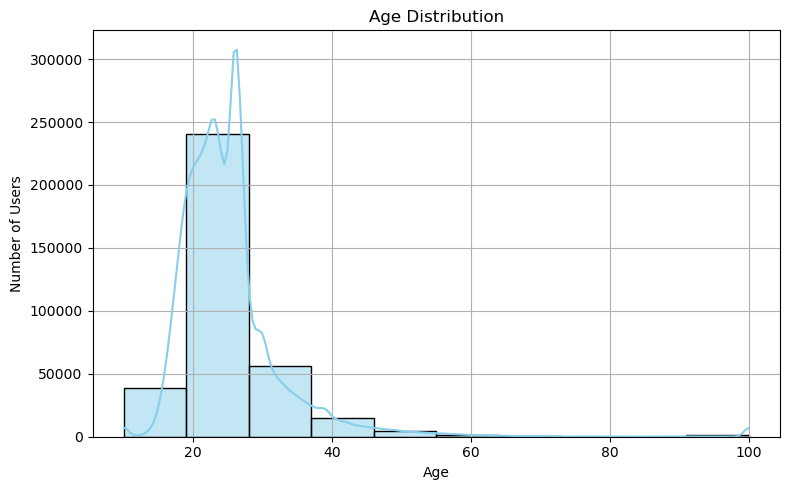

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load users.csv
df_users = pd.read_csv("datasets/data/users.csv")

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_users["age"], bins=10, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.grid(True)
plt.tight_layout()
plt.show()


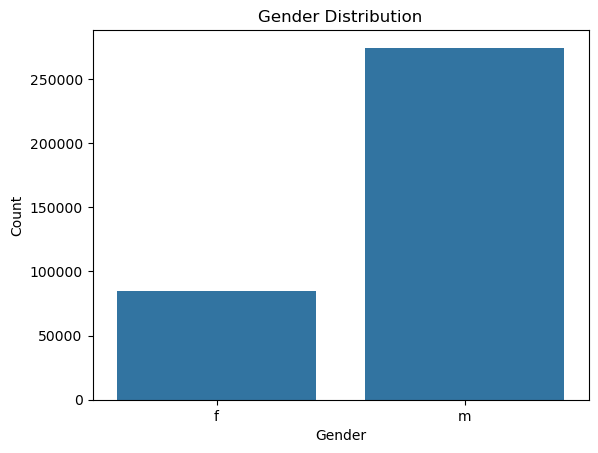

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load updated users.csv and gender_map
df_users = pd.read_csv("datasets/data/users.csv")
gender_map = pd.read_csv("datasets/mapping/gender_map.csv")

# Reverse mapping: int -> gender
gender_reverse_map = dict(zip(gender_map['Value'], gender_map['Gender']))

# Plot
ax = sns.countplot(x="gender", data=df_users)
ax.set_title("Gender Distribution")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

# Set proper x-ticks and labels
ticks = sorted(df_users["gender"].unique())
labels = [gender_reverse_map[val] for val in ticks]
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.show()


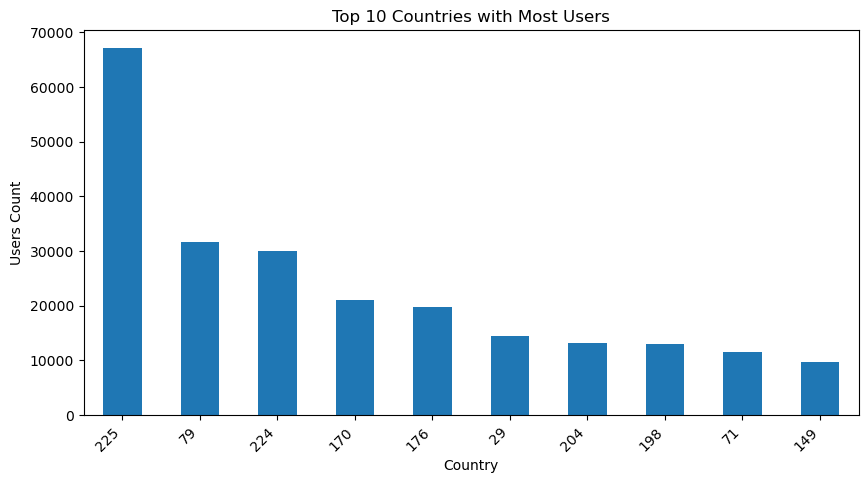

In [332]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Adjust width and height
df_users["country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Country")
plt.ylabel("Users Count")
plt.xticks(rotation=45, ha="right")  # Rotate and align labels for better visibility
plt.show()

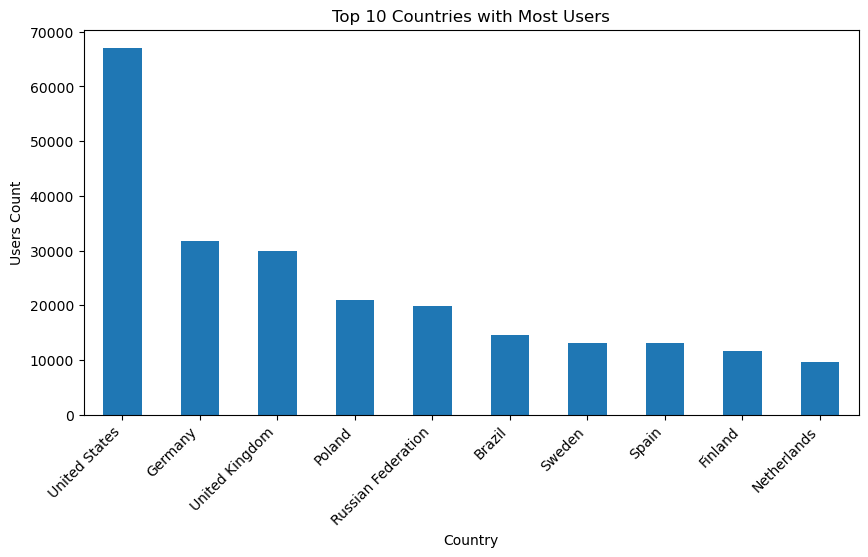

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load country mapping
country_map = pd.read_csv("datasets/mapping/country_map.csv")
country_reverse_map = dict(zip(country_map['Value'], country_map['Country']))

# Map country values back to names
df_users['country_name'] = df_users['country'].map(country_reverse_map)

# Plot
plt.figure(figsize=(10, 5))
df_users['country_name'].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries with Most Users")
plt.xlabel("Country")
plt.ylabel("Users Count")
plt.xticks(rotation=45, ha="right")
plt.show()


##### play_counts.csv

In [ ]:
import pandas as pd

# Load users.csv
df_play_counts = pd.read_csv("datasets/data/play_counts.csv")

# Display first 5 rows
print(df_play_counts.head())

   user_id  artist_id  play_count
0        0          0        2137
1        0          1        1099
2        0          2         897
3        0          3         717
4        0          4         706


In [321]:
# Check dataset info (data types, non-null counts)
print(df_play_counts.info())

# Check shape (number of rows and columns)
print(f"Dataset contains {df_play_counts.shape[0]} rows and {df_play_counts.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17309433 entries, 0 to 17309432
Data columns (total 3 columns):
 #   Column      Dtype
---  ------      -----
 0   user_id     int64
 1   artist_id   int64
 2   play_count  int64
dtypes: int64(3)
memory usage: 396.2 MB
None
Dataset contains 17309433 rows and 3 columns.


In [ ]:
import pandas as pd
import os

# Function to get file size in KB or MB
def get_file_size(file_path):
    size_bytes = os.path.getsize(file_path)
    if size_bytes < 1024:
        return f"{size_bytes} Bytes"
    elif size_bytes < 1024**2:
        return f"{size_bytes / 1024:.2f} KB"
    else:
        return f"{size_bytes / (1024**2):.2f} MB"

# Load play_counts.csv
df_play_counts = pd.read_csv("datasets/users/play_counts.csv")

# Print dataset size before cleaning
print(f"Dataset size: {get_file_size('datasets/users/play_counts.csv')}")


Dataset size: 264.62 MB


In [323]:
# Count missing values in each column
print(df_play_counts.isnull().sum())

user_id       0
artist_id     0
play_count    0
dtype: int64


In [324]:
# Count unique users and artists
num_users = df_play_counts["user_id"].nunique()
num_artists = df_play_counts["artist_id"].nunique()

# Print results
print(f"Number of unique users: {num_users}")
print(f"Number of unique artists: {num_artists}")

Number of unique users: 358856
Number of unique artists: 160112


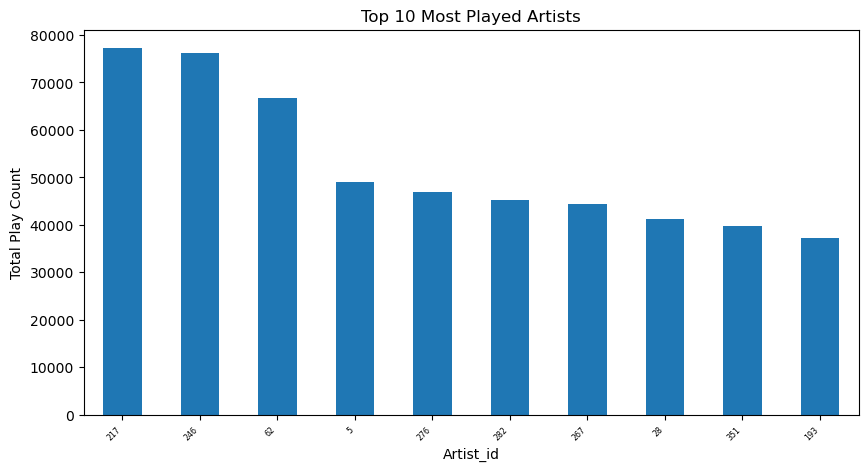

In [334]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Adjust width and height
df_play_counts["artist_id"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Most Played Artists")
plt.xlabel("Artist_id")
plt.ylabel("Total Play Count")
plt.xticks(rotation=45, ha="right", fontsize=5.7)
plt.show()

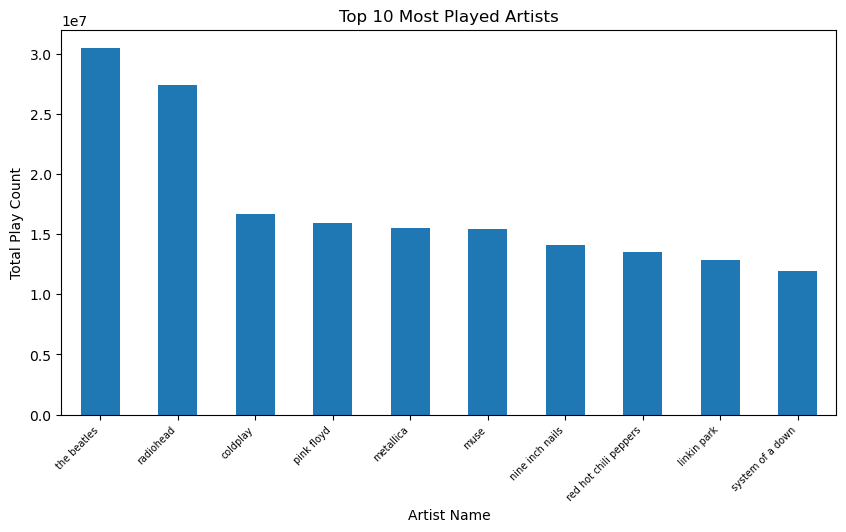

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Load dataset
df_play_counts = pd.read_csv("datasets/originalCSV/play_counts_converted.csv")

# ✅ Rename columns (modify based on actual column order)
df_play_counts.columns = ["user_id", "artist_id", "artist_name", "play_count"]

# ✅ Aggregate total play counts per artist
top_artists = df_play_counts.groupby("artist_name")["play_count"].sum().nlargest(10)

# ✅ Plot the bar chart
plt.figure(figsize=(10, 5))
top_artists.plot(kind="bar")
plt.title("Top 10 Most Played Artists")
plt.xlabel("Artist Name")
plt.ylabel("Total Play Count")
plt.xticks(rotation=45, ha="right", fontsize=7)

plt.show()


### Web

In [ ]:
import pandas as pd

# Load required datasets
user_converted_df = pd.read_csv("datasets/mappedCSV/users_converted_id.csv")
users_df = pd.read_csv("datasets/data/users.csv")
user_id_map_df = pd.read_csv("datasets/mapping/user_id_map.csv")
gender_map_df = pd.read_csv("datasets/mapping/gender_map.csv")

# Rename gender_map columns for clarity
gender_map_df.rename(columns={"Gender": "gender_letter", "Value": "gender_code"}, inplace=True)

# Merge users_df with gender_map to convert gender code (0/1) to letters (f/m)
users_df = users_df.merge(gender_map_df, left_on="gender", right_on="gender_code", how="left")

# Select required columns from users_df
users_selected.rename(columns={"gender_letter": "gender"}, inplace=True)

# Select required columns from user_converted_df
user_converted_selected = user_converted_df[["user_id", "country", "signup_date"]]

# Merge the user data with converted data on user_id
merged_df = pd.merge(users_selected, user_converted_selected, on="user_id", how="left")

# Merge with user_id_map to get original_user_id
final_df = pd.merge(merged_df, user_id_map_df, left_on="user_id", right_on="encoded_user_id", how="left")

# Reorder columns
final_df = final_df[["original_user_id", "encoded_user_id", "age", "gender", "country", "signup_date"]]

# Save to CSV
final_df.to_csv("datasets/web/user_details.csv", index=False)

print(df.head().to_string(index=False))

In [2]:
import pandas as pd

# Load the CSV files
user_details = pd.read_csv('datasets/web/user_details.csv')
hierarchical_clusters = pd.read_csv('datasets/clusters/hierarchical_clusters.csv')

# Merge based on the matching columns
merged_data = user_details.merge(hierarchical_clusters[['user_id', 'final_cluster']],
                                 left_on='encoded_user_id', right_on='user_id', how='left')

# Drop the extra 'user_id' column if you don't want it
merged_data = merged_data.drop(columns=['user_id'])

# Save the updated dataframe back to CSV
merged_data.to_csv('datasets/web/user_details.csv', index=False)


In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv('datasets/web/user_details.csv')

# Replace gender values
df['gender'] = df['gender'].replace({'f': 'Female', 'm': 'Male'})

# Save it back
df.to_csv('datasets/web/user_details.csv', index=False)


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasets/web/user_details.csv")

# Print the first 5 rows of the dataframe with column names and data in a single line
print(df.head().to_string(index=False))


                        original_user_id  encoded_user_id  age gender       country  signup_date final_cluster
00000c289a1829a808ac09c00daf10bc3c4e223b                0   22 Female       Germany  Feb 1, 2007        79_2_1
00001411dc427966b17297bf4d69e7e193135d89                1   26 Female        Canada  Dec 4, 2007        37_2_1
00004d2ac9316e22dc007ab2243d6fcb239e707d                2   26   Male       Germany  Sep 1, 2006        79_2_0
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf                3   19   Male        Mexico Apr 28, 2008       136_0_0
00007a47085b9aab8af55f52ec8846ac479ac4fe                4   28   Male United States Jan 27, 2006       225_2_0


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasets/web/user_details.csv")

# Rename the columns
df.rename(columns={'encoded_user_id': 'user_id'}, inplace=True)

# Print the first 5 rows to verify
print(df.head(5).to_string(index=False))

# Save the updated DataFrame to a new file
df.to_csv("datasets/web/user_details.csv", index=False)


                        original_user_id  user_id  age gender       country  signup_date final_cluster
00000c289a1829a808ac09c00daf10bc3c4e223b        0   22 Female       Germany  Feb 1, 2007        79_2_1
00001411dc427966b17297bf4d69e7e193135d89        1   26 Female        Canada  Dec 4, 2007        37_2_1
00004d2ac9316e22dc007ab2243d6fcb239e707d        2   26   Male       Germany  Sep 1, 2006        79_2_0
000063d3fe1cf2ba248b9e3c3f0334845a27a6bf        3   19   Male        Mexico Apr 28, 2008       136_0_0
00007a47085b9aab8af55f52ec8846ac479ac4fe        4   28   Male United States Jan 27, 2006       225_2_0


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasets/web/user_top_artists.csv")

# Rename the columns
df.rename(columns={'encoded_user_id': 'user_id', 'encoded_artist_id': 'artist_id'}, inplace=True)

# Print the first 5 rows to verify
print(df.head(5).to_string(index=False))

# Save the updated DataFrame to a new file
df.to_csv("datasets/web/user_top_artists.csv", index=False)


                        original_user_id  user_id  artist_id                   original_artist_id  play_counts          top_artists
00000c289a1829a808ac09c00daf10bc3c4e223b        0          0 3bd73256-3905-4f3a-97e2-8b341527f805         2137      betty blowtorch
00000c289a1829a808ac09c00daf10bc3c4e223b        0          1 f2fb0ff0-5679-42ec-a55c-15109ce6e320         1099            die Ärzte
00000c289a1829a808ac09c00daf10bc3c4e223b        0          2 b3ae82c2-e60b-4551-a76d-6620f1b456aa          897    melissa etheridge
00000c289a1829a808ac09c00daf10bc3c4e223b        0          3 3d6bbeb7-f90e-4d10-b440-e153c0d10b53          717            elvenking
00000c289a1829a808ac09c00daf10bc3c4e223b        0          4 bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8          706 juliette & the licks


In [157]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasets/web/movie.csv")

# Print the first 5 rows of the dataframe with column names and data in a single line
print(df.head().to_string(index=False))


    id                                      title  rating  rating_count   status release_date  runtime                         img_path                     movie_path   imdb_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description         

In [164]:
import pandas as pd

# Load the movie dataset and artist dataset
movie_df = pd.read_csv('datasets/web/movie.csv')
artist_df = pd.read_csv('datasets/mappedCSV/play_counts_converted_id.csv')

# Ensure that the artist dataset only has unique artist_id
unique_artists = artist_df.drop_duplicates(subset=['artist_id']).reset_index(drop=True)

# Ensure that the movie dataset only has unique movie ids
unique_movies = movie_df.drop_duplicates(subset=['id']).reset_index(drop=True)

# Verify that the number of unique artists matches the number of unique movies
assert len(unique_artists) == len(unique_movies), "The number of unique artists does not match the number of unique movies."

# Now we can create the mapping between artist_id and movie.id
mapping_df = unique_artists[['artist_id']].copy()
mapping_df['id'] = unique_movies['id']

# Save only the mappings of artist_id and movie.id to a new CSV
mapping_df.to_csv('datasets/mapping/artist_movie.csv', index=False)

# Add artist_name to the mapping and create the new file with artist_id, artist_name, and movie columns
mapping_df['artist_name'] = unique_artists['artist_name'].reset_index(drop=True)
artist_movie_df = pd.concat([mapping_df, unique_movies], axis=1)
artist_movie_df = artist_movie_df[['artist_id', 'artist_name'] + list(movie_df.columns)]

# Save the final dataset to a new CSV
artist_movie_df.to_csv('datasets/web/artist_movie.csv', index=False)

print("Mapping and file creation completed.")


Mapping and file creation completed.


In [168]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasets/web/artist_movie.csv")

# Print the first 5 rows of the dataframe with column names and data in a single line
print(df.head().to_string(index=False))


 artist_id          artist_name     id                                      title  rating  rating_count   status release_date  runtime                         img_path                     movie_path   imdb_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [169]:
import pandas as pd

# Define the base URL for image links
base_url = "https://image.tmdb.org/t/p/w500"

# Load the artist_movie dataset
artist_movie_df = pd.read_csv('datasets/web/artist_movie.csv')

# Convert img_path and poster_path to full URLs
artist_movie_df['img_path'] = base_url + artist_movie_df['img_path'].astype(str)
artist_movie_df['poster_path'] = base_url + artist_movie_df['poster_path'].astype(str)

# Save the modified dataset back to the CSV
artist_movie_df.to_csv('datasets/web/artist_movie.csv', index=False)

print("Image paths converted to clickable links.")


Image paths converted to clickable links.


In [170]:
import pandas as pd

# Load the dataset
df = pd.read_csv("datasets/web/artist_movie.csv")

# Print the first 5 rows of the dataframe with column names and data in a single line
print(df.head().to_string(index=False))


 artist_id          artist_name     id                                      title  rating  rating_count   status release_date  runtime                                                        img_path                     movie_path   imdb_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### Stage 2 - Clustering

#### Users Clustering

##### K-means Clustering

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("datasets/data/users.csv")

# Encode gender
df['gender_encoded'] = df['gender'].astype('int64')

# Encode age group
def assign_age_group(age):
    if 10 <= age < 20:
        return 0
    elif 20 <= age < 40:
        return 1
    elif 40 <= age < 60:
        return 2
    elif 60 <= age < 80:
        return 3
    elif 80 <= age <= 100:
        return 4

df['age_group_encoded'] = df['age'].apply(assign_age_group).astype('int64')

# Directly copy 'country' values to 'country_encoded' since 'country' is already in int64
df['country_encoded'] = df['country']

# Encode country directly as cluster
df['country_cluster'] = df['country_encoded'].astype('int64')

print(f"Total Country Clusters: {df['country_cluster'].nunique()}\n")

# Clustering Age Group within Country
df['age_cluster'] = -1
for country in df['country_cluster'].unique():
    sub_df = df[df['country_cluster'] == country]
    n_clusters = sub_df['age_group_encoded'].nunique()
    if n_clusters < 2:
        df.loc[sub_df.index, 'age_cluster'] = 0
    else:
        # Using KMeans on age group
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(sub_df[['age_group_encoded']])
        df.loc[sub_df.index, 'age_cluster'] = clusters

df['age_cluster'] = df['age_cluster'].astype('int64')
print(f"Total Age Clusters: {df[['country_cluster', 'age_cluster']].drop_duplicates().shape[0]}\n")

# Clustering Gender within (Country, Age) groups
df['gender_cluster'] = -1
for (country, age_cluster), sub_df in df.groupby(['country_cluster', 'age_cluster']):
    n_clusters = sub_df['gender_encoded'].nunique()
    if n_clusters < 2:
        df.loc[sub_df.index, 'gender_cluster'] = 0
    else:
        # Using KMeans on gender
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(sub_df[['gender_encoded']])
        df.loc[sub_df.index, 'gender_cluster'] = clusters

df['gender_cluster'] = df['gender_cluster'].astype('int64')

# Final Cluster
df['final_cluster'] = (
    df['country_cluster'].astype(str) + "_" +
    df['age_cluster'].astype(str) + "_" +
    df['gender_cluster'].astype(str)
)

print(f"Total Final Clusters: {df['final_cluster'].nunique()}\n")

# Save to CSV
df.to_csv("datasets/clusters/kmeans_clusters.csv", index=False)

print("KMeans Clustering completed and saved to 'kmeans_clusters.csv'\n")


Total Country Clusters: 239

Total Age Clusters: 859

Total Final Clusters: 1403

KMeans Clustering completed and saved to 'kmeans_clusters.csv'



In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/clusters/kmeans_clusters.csv")

# Display the first 15 records clearly
print(df.head(15).to_string(index=False))


 user_id  gender  age  country  gender_encoded  age_group_encoded  country_encoded  country_cluster  age_cluster  gender_cluster final_cluster
       0       0   22       79               0                  1               79               79            1               1        79_1_1
       1       0   26       37               0                  1               37               37            1               1        37_1_1
       2       1   26       79               1                  1               79               79            1               0        79_1_0
       3       1   19      136               1                  0              136              136            1               0       136_1_0
       4       1   28      225               1                  1              225              225            0               0       225_0_0
       5       1   20      224               1                  1              224              224            0               0       224_0_0

##### KMedoids Clustering

In [45]:
import numpy as np
import pandas as pd
import warnings
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, manhattan_distance
from pyclustering.utils import type_metric
from sklearn.metrics import pairwise_distances

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("datasets/data/users.csv")

# Encode gender
df['gender_encoded'] = df['gender'].astype('int64')

# Encode age group
def assign_age_group(age):
    if 10 <= age < 20:
        return 0
    elif 20 <= age < 40:
        return 1
    elif 40 <= age < 60:
        return 2
    elif 60 <= age < 80:
        return 3
    elif 80 <= age <= 100:
        return 4

df['age_group_encoded'] = df['age'].apply(assign_age_group).astype('int64')
df['country_encoded'] = df['country'].astype('int64')
df['country_cluster'] = df['country_encoded'] 

# Age clustering using sampled KMedoids
df['age_cluster'] = -1
for country in df['country_cluster'].unique():
    sub_df = df[df['country_cluster'] == country]
    n_clusters = sub_df['age_group_encoded'].nunique()
    data_all = sub_df[['age_group_encoded']].values

    if n_clusters < 2 or len(data_all) < n_clusters:
        df.loc[sub_df.index, 'age_cluster'] = 0
    else:
        sample_df = sub_df.sample(min(500, len(sub_df)), random_state=42)
        data_sample = sample_df[['age_group_encoded']].values.tolist()
        manhattan = distance_metric(type_metric.USER_DEFINED, func=manhattan_distance)
        init_medoids = list(range(min(len(data_sample), n_clusters)))
        kmedoids_instance = kmedoids(data_sample, init_medoids, metric=manhattan)
        kmedoids_instance.process()
        medoid_indices = kmedoids_instance.get_medoids()
        medoids = np.array([data_sample[i] for i in medoid_indices])

        distances = pairwise_distances(data_all, medoids, metric='manhattan')
        assignments = np.argmin(distances, axis=1)
        df.loc[sub_df.index, 'age_cluster'] = assignments

df['age_cluster'] = df['age_cluster'].astype('int64')

# Gender clustering using sampled KMedoids
df['gender_cluster'] = -1
for (country, age_cluster), sub_df in df.groupby(['country_cluster', 'age_cluster']):
    n_clusters = sub_df['gender_encoded'].nunique()
    data_all = sub_df[['gender_encoded']].values

    if n_clusters < 2 or len(data_all) < n_clusters:
        df.loc[sub_df.index, 'gender_cluster'] = 0
    else:
        sample_df = sub_df.sample(min(500, len(sub_df)), random_state=42)
        data_sample = sample_df[['gender_encoded']].values.tolist()
        manhattan = distance_metric(type_metric.USER_DEFINED, func=manhattan_distance)
        init_medoids = list(range(min(len(data_sample), n_clusters)))
        kmedoids_instance = kmedoids(data_sample, init_medoids, metric=manhattan)
        kmedoids_instance.process()
        medoid_indices = kmedoids_instance.get_medoids()
        medoids = np.array([data_sample[i] for i in medoid_indices])

        distances = pairwise_distances(data_all, medoids, metric='manhattan')
        assignments = np.argmin(distances, axis=1)
        df.loc[sub_df.index, 'gender_cluster'] = assignments

df['gender_cluster'] = df['gender_cluster'].astype('int64')

# Final cluster
df['final_cluster'] = (
    df['country_cluster'].astype(str) + "_" +
    df['age_cluster'].astype(str) + "_" +
    df['gender_cluster'].astype(str)
)

df.to_csv("datasets/clusters/kmedoids_clusters.csv", index=False)

print(f"Total Country Clusters: {df['country_cluster'].nunique()}")
print(f"\nTotal Age Clusters: {df[['country_cluster', 'age_cluster']].drop_duplicates().shape[0]}")
print(f"\nTotal Final Clusters: {df['final_cluster'].nunique()}")
print("\nKMedoids Clustering completed and saved to 'kmedoids_clusters.csv'")


Total Country Clusters: 239

Total Age Clusters: 837

Total Final Clusters: 1368

KMedoids Clustering completed and saved to 'kmedoids_clusters.csv'


In [46]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/clusters/kmedoids_clusters.csv")

# Display the first 15 records clearly
print(df.head(15).to_string(index=False))


 user_id  gender  age  country  gender_encoded  age_group_encoded  country_encoded  country_cluster  age_cluster  gender_cluster final_cluster
    0       0     22     79           0                1                 79               79             3              0            79_3_0   
    1       0     26     37           0                1                 37               37             3              0            37_3_0   
    2       1     26     79           1                1                 79               79             3              1            79_3_1   
    3       1     19    136           1                0                136              136             0              1           136_0_1   
    4       1     28    225           1                1                225              225             2              0           225_2_0   
    5       1     20    224           1                1                224              224             4              0           224_4_0   

##### Hierarchical Clustering

In [15]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("datasets/data/users.csv")

# Encode gender
df['gender_encoded'] = df['gender'].astype('int64')

# Encode age group
def assign_age_group(age):
    if 10 <= age < 20:
        return 0
    elif 20 <= age < 40:
        return 1
    elif 40 <= age < 60:
        return 2
    elif 60 <= age < 80:
        return 3
    elif 80 <= age <= 100:
        return 4

df['age_group_encoded'] = df['age'].apply(assign_age_group).astype('int64')

# Directly copy 'country' values to 'country_encoded' since 'country' is already in int64
df['country_encoded'] = df['country']

# Encode country directly as cluster
df['country_cluster'] = df['country_encoded'].astype('int64')

print(f"Total Country Clusters: {df['country_cluster'].nunique()}\n")

# Clustering Age Group within Country
df['age_cluster'] = -1
for country in df['country_cluster'].unique():
    # Create mask for the current country group
    mask = df['country_cluster'] == country
    sub_df = df[mask]
    n_clusters = sub_df['age_group_encoded'].nunique()
    
    if n_clusters < 2:
        # Directly update 'age_cluster' without creating sub_df copies
        df.loc[mask, 'age_cluster'] = 0
    else:
        # Using AgglomerativeClustering on age group
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        clusters = agglomerative.fit_predict(sub_df[['age_group_encoded']])
        df.loc[mask, 'age_cluster'] = clusters

df['age_cluster'] = df['age_cluster'].astype('int64')
print(f"Total Age Clusters: {df[['country_cluster', 'age_cluster']].drop_duplicates().shape[0]}\n")

# Clustering Gender within (Country, Age) groups
df['gender_cluster'] = -1
for (country, age_cluster), sub_df in df.groupby(['country_cluster', 'age_cluster']):
    # Create mask for the current (country, age_cluster) group
    mask = (df['country_cluster'] == country) & (df['age_cluster'] == age_cluster)
    n_clusters = sub_df['gender_encoded'].nunique()
    
    if n_clusters < 2:
        # Directly update 'gender_cluster' without creating sub_df copies
        df.loc[mask, 'gender_cluster'] = 0
    else:
        # Using AgglomerativeClustering on gender
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
        clusters = agglomerative.fit_predict(sub_df[['gender_encoded']])
        df.loc[mask, 'gender_cluster'] = clusters

df['gender_cluster'] = df['gender_cluster'].astype('int64')

# Final Cluster
df['final_cluster'] = (
    df['country_cluster'].astype(str) + "_" +
    df['age_cluster'].astype(str) + "_" +
    df['gender_cluster'].astype(str)
)

print(f"Total Final Clusters: {df['final_cluster'].nunique()}\n")

# Save to CSV
df.to_csv("datasets/clusters/hierarchical_clusters.csv", index=False)

print("Hierarchical Clustering completed and saved to 'hierarchical_clusters.csv'\n")


Total Country Clusters: 239

Total Age Clusters: 859

Total Final Clusters: 1403

Hierarchical Clustering completed and saved to 'hierarchical_clusters.csv'



In [16]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/clusters/hierarchical_clusters.csv")

# Display the first 15 records clearly
print(df.head(15).to_string(index=False))


 user_id  gender  age  country  gender_encoded  age_group_encoded  country_encoded  country_cluster  age_cluster  gender_cluster final_cluster
       0       0   22       79               0                  1               79               79            2               1        79_2_1
       1       0   26       37               0                  1               37               37            2               1        37_2_1
       2       1   26       79               1                  1               79               79            2               0        79_2_0
       3       1   19      136               1                  0              136              136            0               0       136_0_0
       4       1   28      225               1                  1              225              225            2               0       225_2_0
       5       1   20      224               1                  1              224              224            2               0       224_2_0

##### Gaussian Mixture Model Clustering

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("datasets/data/users.csv")

# Encode gender
df['gender_encoded'] = df['gender'].astype('int64')

# Encode age group
def assign_age_group(age):
    if 10 <= age < 20:
        return 0
    elif 20 <= age < 40:
        return 1
    elif 40 <= age < 60:
        return 2
    elif 60 <= age < 80:
        return 3
    elif 80 <= age <= 100:
        return 4

df['age_group_encoded'] = df['age'].apply(assign_age_group).astype('int64')

# Directly copy 'country' values to 'country_encoded' since 'country' is already in int64
df['country_encoded'] = df['country']

# Encode country directly as cluster
df['country_cluster'] = df['country_encoded'].astype('int64')

print(f"Total Country Clusters: {df['country_cluster'].nunique()}\n")

# Clustering Age Group within Country
df['age_cluster'] = -1
for country in df['country_cluster'].unique():
    sub_df = df[df['country_cluster'] == country]
    n_clusters = sub_df['age_group_encoded'].nunique()
    if n_clusters < 2:
        df.loc[sub_df.index, 'age_cluster'] = 0
    else:
        # Using Gaussian Mixture Model on age group
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        clusters = gmm.fit_predict(sub_df[['age_group_encoded']])
        df.loc[sub_df.index, 'age_cluster'] = clusters

df['age_cluster'] = df['age_cluster'].astype('int64')
print(f"Total Age Clusters: {df[['country_cluster', 'age_cluster']].drop_duplicates().shape[0]}\n")

# Clustering Gender within (Country, Age) groups
df['gender_cluster'] = -1
for (country, age_cluster), sub_df in df.groupby(['country_cluster', 'age_cluster']):
    n_clusters = sub_df['gender_encoded'].nunique()
    if n_clusters < 2:
        df.loc[sub_df.index, 'gender_cluster'] = 0
    else:
        # Using Gaussian Mixture Model on gender
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        clusters = gmm.fit_predict(sub_df[['gender_encoded']])
        df.loc[sub_df.index, 'gender_cluster'] = clusters

df['gender_cluster'] = df['gender_cluster'].astype('int64')

# Final Cluster
df['final_cluster'] = (
    df['country_cluster'].astype(str) + "_" +
    df['age_cluster'].astype(str) + "_" +
    df['gender_cluster'].astype(str)
)

print(f"Total Final Clusters: {df['final_cluster'].nunique()}\n")

# Save to CSV
df.to_csv("datasets/clusters/gmm_clusters.csv", index=False)

print("Gaussian Mixture Model Clustering completed and saved to 'gmm_clusters.csv'\n")


Total Country Clusters: 239

Total Age Clusters: 859

Total Final Clusters: 1403

Gaussian Mixture Model Clustering completed and saved to 'gmm_clusters.csv'



In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/clusters/gmm_clusters.csv")

# Display the first 15 records clearly
print(df.head(15).to_string(index=False))


 user_id  gender  age  country  gender_encoded  age_group_encoded  country_encoded  country_cluster  age_cluster  gender_cluster final_cluster
       0       0   22       79               0                  1               79               79            1               1        79_1_1
       1       0   26       37               0                  1               37               37            1               1        37_1_1
       2       1   26       79               1                  1               79               79            1               0        79_1_0
       3       1   19      136               1                  0              136              136            1               0       136_1_0
       4       1   28      225               1                  1              225              225            0               0       225_0_0
       5       1   20      224               1                  1              224              224            0               0       224_0_0

##### HDBSCAN Clustering

In [5]:
import pandas as pd
import hdbscan
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("datasets/data/users.csv")

# Encode gender
df['gender_encoded'] = df['gender'].astype('int64')

# Encode age group
def assign_age_group(age):
    if 10 <= age < 20:
        return 0
    elif 20 <= age < 40:
        return 1
    elif 40 <= age < 60:
        return 2
    elif 60 <= age < 80:
        return 3
    elif 80 <= age <= 100:
        return 4

df['age_group_encoded'] = df['age'].apply(assign_age_group).astype('int64')

# Copy country as encoded
df['country_encoded'] = df['country']
df['country_cluster'] = df['country_encoded'].astype('int64')

print(f"Total Country Clusters: {df['country_cluster'].nunique()}\n")

# Clustering Age Group within Country
df['age_cluster'] = -1
for country in df['country_cluster'].unique():
    sub_df = df[df['country_cluster'] == country]
    if len(sub_df['age_group_encoded'].unique()) < 2:
        df.loc[sub_df.index, 'age_cluster'] = 0
    else:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
        clusters = clusterer.fit_predict(sub_df[['age_group_encoded']])
        df.loc[sub_df.index, 'age_cluster'] = clusters

df['age_cluster'] = df['age_cluster'].astype('int64')
print(f"Total Age Clusters: {df[['country_cluster', 'age_cluster']].drop_duplicates().shape[0]}\n")

# Clustering Gender within (Country, Age)
df['gender_cluster'] = -1
for (country, age_cluster), sub_df in df.groupby(['country_cluster', 'age_cluster']):
    if len(sub_df['gender_encoded'].unique()) < 2:
        df.loc[sub_df.index, 'gender_cluster'] = 0
    else:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=2)
        clusters = clusterer.fit_predict(sub_df[['gender_encoded']])
        df.loc[sub_df.index, 'gender_cluster'] = clusters

df['gender_cluster'] = df['gender_cluster'].astype('int64')

# Final Cluster
df['final_cluster'] = (
    df['country_cluster'].astype(str) + "_" +
    df['age_cluster'].astype(str) + "_" +
    df['gender_cluster'].astype(str)
)

print(f"Total Final Clusters: {df['final_cluster'].nunique()}\n")

# Save to CSV
df.to_csv("datasets/clusters/hdbscan_clusters.csv", index=False)

print("HDBSCAN Clustering completed and saved to 'hdbscan_clusters.csv'\n")


Total Country Clusters: 239

Total Age Clusters: 746

Total Final Clusters: 1144

HDBSCAN Clustering completed and saved to 'hdbscan_clusters.csv'



In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/clusters/hdbscan_clusters.csv")

# Display the first 15 records clearly
print(df.head(15).to_string(index=False))


 user_id  gender  age  country  gender_encoded  age_group_encoded  country_encoded  country_cluster  age_cluster  gender_cluster final_cluster
       0       0   22       79               0                  1               79               79            1               1        79_1_1
       1       0   26       37               0                  1               37               37            3               0        37_3_0
       2       1   26       79               1                  1               79               79            1               0        79_1_0
       3       1   19      136               1                  0              136              136            0               1       136_0_1
       4       1   28      225               1                  1              225              225            3               1       225_3_1
       5       1   20      224               1                  1              224              224            2               1       224_2_1

##### Silhoutte Score Calculation

In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

# Function to calculate silhouette score for a given dataset and cluster column
def calculate_silhouette(data, feature_cols, cluster_col):
    if data[cluster_col].nunique() > 1 and len(data[cluster_col].unique()) < len(data):
        X = data[feature_cols]
        return silhouette_score(X, data[cluster_col])
    return np.nan  # Return NaN if only one cluster or too many clusters

# Function to evaluate clustering performance for a given CSV file
def evaluate_clustering(csv_path, method_name):
    df = pd.read_csv(csv_path)

    # Select relevant features
    feature_cols = ['country_encoded', 'age_group_encoded', 'gender_encoded']

    # Calculate silhouette scores for each clustering level
    country_score = calculate_silhouette(df, ['country_encoded'], 'country_cluster')
    age_score = calculate_silhouette(df, ['age_group_encoded'], 'age_cluster')
    gender_score = calculate_silhouette(df, ['gender_encoded'], 'gender_cluster')
    final_score = calculate_silhouette(df, feature_cols, 'final_cluster')

    # Compute the average silhouette score
    avg_score = np.nanmean([country_score, age_score, gender_score, final_score])

    return {"Method": method_name, "Silhouette Score": avg_score}

# Evaluate for each clustering method
results = [
    evaluate_clustering("datasets/clusters/kmeans_clusters.csv", "K-Means"),
    evaluate_clustering("datasets/clusters/hierarchical_clusters.csv", "Hierarchical"),
    evaluate_clustering("datasets/clusters/kmedoids_clusters.csv", "K-Medoids"),
    evaluate_clustering("datasets/clusters/gmm_clusters.csv", "GMM"),
    evaluate_clustering("datasets/clusters/hdbscan_clusters.csv", "HDBSCAN"),
]

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Sort by Average Silhouette Score (Higher is better)
df_results = df_results.sort_values(by="Silhouette Score", ascending=False)

# Print only the average silhouette scores
print(df_results[["Method", "Silhouette Score"]])


      Method     Silhouette Score
1  Hierarchical      0.909513    
0       K-Means      0.731634    
3           GMM      0.731634    
2     K-Medoids      0.538260    
4       HDBSCAN      0.439635    


#### Artists Clusters

##### Rule-Based Clustering

In [63]:
import numpy as np
import pandas as pd

# ✅ Load Dataset
df_play_counts = pd.read_csv("datasets/data/play_counts.csv")

# ✅ Aggregate Artist Features
artist_stats = df_play_counts.groupby("artist_id").agg(
    total_play_count=("play_count", "sum"),
    unique_listeners=("user_id", "nunique")
).reset_index()

# ✅ Define Conditions for Clusters
play = artist_stats["total_play_count"]
listeners = artist_stats["unique_listeners"]

conditions = [
    (play < 1000) & (listeners < 5),
    (play.between(1000, 4999)) & (listeners.between(5, 9)),
    (play.between(5000, 7499)) & (listeners.between(10, 14)),
    (play.between(7500, 9999)) & (listeners.between(15, 199)),
    (play >= 10000) & (listeners >= 200),
    (listeners < 5),
    (listeners.between(5, 9)),
    (listeners.between(10, 14)),
    (listeners.between(15, 199)),
    (listeners >= 200)
]

choices = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

# ✅ Assign Clusters
artist_stats["artist_cluster"] = np.select(conditions, choices, default=0)

# ✅ Save Clustered Artists Data
artist_stats.to_csv("datasets/clusters/artists_clusters.csv", index=False)
print("Artist Clustering Completed and Saved to 'artists_clusters.csv'!")

Artist Clustering Completed and Saved to 'artists_clusters.csv'!


In [65]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/clusters/artists_clusters.csv")

# Display the first 15 records clearly
print(df.head().to_string(index=False))


 artist_id  total_play_count  unique_listeners  artist_cluster
    0             25651               96              4       
    1           3704888             8567              5       
    2            180391              924              5       
    3            410725             1475              5       
    4            255091             1377              5       


In [62]:
import pandas as pd

# Load the artist clusters data
df_artists = pd.read_csv("datasets/clusters/artists_clusters.csv")

# Group by artist_cluster and count the unique artist_ids
unique_artists_per_cluster = df_artists.groupby('artist_cluster')['artist_id'].nunique()

# Display the result
print(unique_artists_per_cluster)


artist_cluster
1    72452
2    23739
3    11866
4    41480
5    10575
Name: artist_id, dtype: int64


### Stage 3 - Similarity Calculation

#### Users

##### Inverse Absolute Difference Similarity

In [4]:
import pandas as pd

# Load User Data
df_users = pd.read_csv("datasets/clusters/hierarchical_clusters.csv")

# Function to Compute & Store Top 5 Similar Users
def compute_top_similar_users(users, filename):
    user_ids = users["user_id"].values
    ages = users["age"].values  # Directly use age

    with open(filename, "a") as file:
        for i in range(len(users)):
            similarities = []

            # Compare each user with every other user in the cluster
            for j in range(len(users)):
                if i != j:  # Exclude self-comparison
                    age_diff = abs(ages[i] - ages[j])
                    similarity_score = 1 / (1 + age_diff)  # Inverse age difference

                    similarities.append((user_ids[j], similarity_score))

            # Sort by similarity and take up to 5 similar users
            top_similar = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]

            # Write to file
            for sim_user, score in top_similar:
                file.write(f"{user_ids[i]},{sim_user},{score:.4f}\n")

# Create CSV File with Header
with open("datasets/similarity/users_similarity.csv", "w") as file:
    file.write("user_id,similar_user,similarity_score\n")

# Compute Similarity Within Each Final Cluster (Only if cluster has > 5 users)
for final_cluster, group in df_users.groupby("final_cluster"):
    if len(group) > 5:
        compute_top_similar_users(group, "datasets/similarity/users_similarity.csv")

print("User similarity for clusters with more than 5 users computed and saved.")

User similarity for clusters with more than 5 users computed and saved.


In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/similarity/users_similarity.csv")

# Display the first 15 records clearly
print(df.head(15).to_string(index=False))

 user_id  similar_user  similarity_score
    3638        280529            1.0000
    3638        310475            1.0000
    3638        325523            1.0000
    3638        165726            0.5000
    3638         75868            0.3333
    5912        158218            0.3333
    5912         25033            0.2500
    5912         90927            0.2500
    5912        109594            0.2500
    5912        182306            0.2500
   13921         60740            1.0000
   13921        354595            1.0000
   13921        189200            0.5000
   13921        250768            0.5000
   13921         58965            0.3333


#### Artists

##### Cosine Similarity

In [83]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np
from joblib import Parallel, delayed

# ✅ Load data
df_play_counts = pd.read_csv("datasets/data/play_counts.csv", usecols=["artist_id", "user_id"])
df_artists = pd.read_csv("datasets/clusters/artists_clusters.csv")  # Artist clusters

# ✅ Map artist and user IDs to indices
artist_ids = df_play_counts["artist_id"].unique()
user_ids = df_play_counts["user_id"].unique()

artist_index = {aid: idx for idx, aid in enumerate(artist_ids)}
user_index = {uid: idx for idx, uid in enumerate(user_ids)}

# ✅ Create sparse matrix (CSR format)
rows, cols, data = [], [], []

for idx, row in df_play_counts.iterrows():
    rows.append(artist_index[row['artist_id']])
    cols.append(user_index[row['user_id']])
    data.append(1)

sparse_matrix = csr_matrix((data, (rows, cols)), shape=(len(artist_ids), len(user_ids)))

# ✅ Load artist's unique listener count from the cluster dataset
df_artists['unique_listeners'] = df_artists['unique_listeners'].fillna(0)

# ✅ Compute similarity within clusters (vectorized + caching)
top_k = 5

def compute_similarity_for_cluster(cluster_id, group):
    cluster_results = []
    artist_ids_in_cluster = group["artist_id"].values
    cluster_indices = [artist_index[aid] for aid in artist_ids_in_cluster]
    
    # Row caching (still use sparse matrix)
    artist_rows = {idx: sparse_matrix[idx, :].reshape(1, -1) for idx in cluster_indices}
    
    # Use sparse matrix directly for cosine similarity
    cluster_sparse_matrix = sparse_matrix[cluster_indices, :]
    sim_matrix = cosine_similarity(cluster_sparse_matrix, dense_output=False)  # Sparse similarity matrix
    
    for i, artist_i_idx in enumerate(cluster_indices):
        sim_scores = sim_matrix[i].toarray().flatten()  # Convert sparse row to dense (1D array)
        sim_scores[i] = -1  # Exclude self
        
        top_indices = np.argsort(sim_scores)[::-1][:top_k]
        added = 0
        already_added_ids = set()

        for idx in top_indices:
            if sim_scores[idx] <= 0:
                continue
            cluster_results.append([
                artist_ids_in_cluster[i],
                artist_ids_in_cluster[idx],
                sim_scores[idx]
            ])
            already_added_ids.add(artist_ids_in_cluster[idx])
            added += 1
        
        # Fill with top-played if needed
        if added < top_k:
            top_played_artists = group.sort_values(by='unique_listeners', ascending=False)['artist_id'].values
            for top_artist in top_played_artists:
                if top_artist == artist_ids_in_cluster[i] or top_artist in already_added_ids:
                    continue
                top_artist_idx = artist_index[top_artist]
                sim_score = cosine_similarity(
                    artist_rows[artist_i_idx],
                    sparse_matrix[top_artist_idx, :].reshape(1, -1)
                ).flatten()[0]
                cluster_results.append([
                    artist_ids_in_cluster[i],
                    top_artist,
                    sim_score
                ])
                already_added_ids.add(top_artist)
                added += 1
                if added >= top_k:
                    break
    
    return cluster_results

# ✅ Run in parallel for each cluster
results = Parallel(n_jobs=-1)(
    delayed(compute_similarity_for_cluster)(cluster_id, group)
    for cluster_id, group in df_artists.groupby("artist_cluster")
)

# ✅ Flatten and save results
flattened_results = [item for sublist in results for item in sublist]
df_results = pd.DataFrame(flattened_results, columns=["artist_id", "similar_artist_id", "similarity_score"])
df_results.to_csv("datasets/similarity/artists_similarity.csv", index=False)

print("Artist similarity computation completed and saved using Cosine Similarity.")


Artist similarity computation completed and saved using Cosine Similarity.


In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("datasets/similarity/artists_similarity.csv")

# Display the first 15 records clearly
print(df.head().to_string(index=False))

 artist_id  similar_artist_id  similarity_score
       454             126743          0.500000
       454             126744          0.500000
       454             124443          0.353553
       454             124444          0.288675
       454             124442          0.288675


### Stage 4 - Association Rule Mining

In [78]:
import pandas as pd

# Load the dataset
df = pd.read_csv('datasets/clusters/hierarchical_clusters.csv')

# Group by 'final_cluster' and count the number of users in each cluster
cluster_counts = df['final_cluster'].value_counts()

# Filter clusters with less than 6 users
small_clusters = cluster_counts[cluster_counts < 6]

# Get the number of clusters with less than 6 users
num_small_clusters = small_clusters.count()

print(f'Number of clusters with less than 6 users: {num_small_clusters}')


Number of clusters with less than 6 users: 717


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load user data
df_users = pd.read_csv("datasets/clusters/hierarchical_clusters.csv")
user_data = df_users.set_index("user_id").to_dict(orient="index")

def cosine_similarity_score(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0] if np.linalg.norm(vec1) != 0 and np.linalg.norm(vec2) != 0 else 0

def age_similarity(age1, age2):
    return 1 / (1 + abs(age1 - age2))

# Map: cluster_id → set of user_ids (only small clusters)
cluster_users = {
    cid: set(group["user_id"])
    for cid, group in df_users.groupby("final_cluster")
    if len(group) <= 5
}

# Precompute cluster attributes: cluster_id → set of (gender, country, age_group)
cluster_attributes = {
    cid: set((user_data[uid]["gender_cluster"], user_data[uid]["country_cluster"], user_data[uid]["age_cluster"]) for uid in uids)
    for cid, uids in cluster_users.items()
}

# Precompute user_id → cluster_id
user_cluster_map = df_users.set_index("user_id")["final_cluster"].to_dict()

# Store similarity results
results = []

for user_id in df_users["user_id"]:
    current_cluster = user_cluster_map[user_id]
    if current_cluster not in cluster_users:
        continue

    user_info = user_data[user_id]
    user_attrs = (user_info["gender_cluster"], user_info["country_cluster"], user_info["age_cluster"])
    user_age = int(user_info["age"])

    combined_clusters = {current_cluster}
    added_users = cluster_users[current_cluster] - {user_id}

    priority_clusters = {1: [], 2: [], 3: [], 4: []}

    for cid, attr_set in cluster_attributes.items():
        if cid == current_cluster:
            continue
        for attr in attr_set:
            gender, country, age_group = attr
            if attr == user_attrs:
                priority_clusters[1].append(cid)
            elif gender != user_attrs[0] and country == user_attrs[1] and age_group == user_attrs[2]:
                priority_clusters[2].append(cid)
            elif gender == user_attrs[0] and country == user_attrs[1]:
                priority_clusters[3].append(cid)
            elif country == user_attrs[1]:
                priority_clusters[4].append(cid)

    for p in range(1, 5):
        for cid in priority_clusters[p]:
            if cid not in combined_clusters:
                combined_clusters.add(cid)
                added_users.update(cluster_users[cid])
                if len(added_users) >= 6:
                    break
        if len(added_users) >= 6:
            break

    similarities = []
    user_vals = np.array([1 if user_info[val] == 'Yes' else 0 for val in ['gender_cluster', 'country_cluster', 'age_cluster']])

    for other_id in added_users:
        cand_info = user_data[other_id]
        cand_vals = np.array([1 if cand_info[val] == 'Yes' else 0 for val in ['gender_cluster', 'country_cluster', 'age_cluster']])
        
        # Cosine similarity calculation
        cosine_sim = cosine_similarity_score(user_vals, cand_vals)
        
        # Age similarity calculation
        age_sim = age_similarity(user_age, int(cand_info["age"]))
        
        # Final score
        score = round((cosine_sim + age_sim) / 2, 4)
        similarities.append((other_id, score))

    top5 = sorted(similarities, key=lambda x: x[1], reverse=True)[:5]
    results.extend([[user_id, other_id, score] for other_id, score in top5])

# -----------------------------------
# Important change: Append without deleting
# -----------------------------------

# Load existing data
existing_df = pd.read_csv("datasets/similarity/users_similarity.csv")

# Create new DataFrame from results
new_df = pd.DataFrame(results, columns=["user_id", "similar_user", "similarity_score"])

# Combine old + new
combined_df = pd.concat([existing_df, new_df], ignore_index=True)

# Drop duplicates if needed (optional)
combined_df = combined_df.drop_duplicates(subset=["user_id", "similar_user"], keep="first")

# Save back
combined_df.to_csv("datasets/similarity/users_similarity.csv", index=False)

print("Association Rule Mining results appended without deleting previous data.")


Association Rule Mining results appended without deleting previous data.


In [7]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/similarity/users_similarity.csv")

# Display the first 15 records clearly
print(df.head(15).to_string(index=False))

 user_id  similar_user  similarity_score
    3638        280529            1.0000
    3638        310475            1.0000
    3638        325523            1.0000
    3638        165726            0.5000
    3638         75868            0.3333
    5912        158218            0.3333
    5912         25033            0.2500
    5912         90927            0.2500
    5912        109594            0.2500
    5912        182306            0.2500
   13921         60740            1.0000
   13921        354595            1.0000
   13921        189200            0.5000
   13921        250768            0.5000
   13921         58965            0.3333


### Stage 5 - Hybrid Recommendations

#### Top - 3 Recommendations

##### Hybrid Recommendations

In [119]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import defaultdict

warnings.filterwarnings("ignore")

# ------------------ Load Datasets ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 3
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')[['similar_artist_id']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_sim_map = user_similarity.groupby('user_id')[['similar_user']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_recommendations(recs_map):
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    for user_id in USER_SUBSET:
        recommended = recs_map.get(user_id, [])[:3]
        if not recommended:
            continue
        top_artist = user_top_artist_first_map.get(user_id)
        similar_users = [su[0] for su in user_sim_map.get(user_id, [])]
        relevant_artists = set()

        if top_artist in artist_sim_map:
            relevant_artists.update([a[0] for a in artist_sim_map[top_artist]])

        for su in similar_users:
            su_top = user_top_artist_first_map.get(su)
            if su_top in artist_sim_map:
                relevant_artists.update([a[0] for a in artist_sim_map[su_top]])
            relevant_artists.update(user_top5_artists_map.get(su, []))

        hits = len(set(recommended) & relevant_artists)
        accuracy = 1 if hits > 0 else 0
        precision = hits / len(recommended)
        recall = hits / len(relevant_artists) if relevant_artists else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)
    return np.mean(metrics['f1'])

def generate_recommendations(users_list, alpha, beta):
    recommendations = defaultdict(list)
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]
        candidate_artists = []

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.extend([sa[0] for sa in similar_artists])

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su[0], [])[:n]
                candidate_artists.extend(su_top_artists)

            candidate_artists = [a for a in candidate_artists if a not in listened_artists]
            unique_candidates = list(set(candidate_artists))

            scored_artists = {}
            for artist in unique_candidates:
                freq = candidate_artists.count(artist)
                if not listened_artists:
                    cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users[:2] if user_top_artist_cf_map.get(su[0])]
                    cf_score = np.mean(cf_scores) if cf_scores else 0
                    score = freq / 20 + cf_score
                else:
                    cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                    cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
                    cf_score = np.mean(cf_scores) if cf_scores else 0
                    score = freq / 20 + alpha * cbf_score + beta * cf_score
                scored_artists[int(artist)] = round(score, 4)

            top_recs = sorted(scored_artists.items(), key=lambda x: -x[1])[:NUM_RECOMMENDATIONS]
            if len(top_recs) >= NUM_RECOMMENDATIONS:
                for aid, _ in top_recs:
                    recommendations[user_id].append(int(aid))
                break
    return recommendations

# ------------------ Random Search for Alpha and Beta ------------------
best_alpha, best_beta, best_f1 = 0.5, 0.5, -1
for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    rec_map = generate_recommendations(USER_SUBSET, alpha, beta)
    f1 = evaluate_recommendations(rec_map)
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha
        best_beta = beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Generate Final Recommendations ------------------
final_recs = []
rec_map = generate_recommendations(ALL_USERS, best_alpha, best_beta)

for user_id, artist_ids in rec_map.items():
    for aid in artist_ids:
        top_artists = user_top_artist_map.get(user_id, [])
        cbf_score = get_cosine_sim(aid, top_artists[0]) if top_artists else 0

        sim_users = user_sim_map.get(user_id, [])[:3]
        cf_scores = [get_cosine_sim(aid, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
        cf_score = np.mean(cf_scores) if cf_scores else 0

        freq = play_counts[(play_counts.user_id == user_id) & (play_counts.artist_id == aid)].shape[0]

        if user_id in user_listened_artists:
            score = round(freq / 20 + best_alpha * cbf_score + best_beta * cf_score, 4)
        else:
            score = round(freq / 20 + cf_score, 4)

        final_recs.append({
            'user_id': user_id,
            'artist_id': aid,
            'hybrid_score': score
        })

# ------------------ Save to CSV ------------------
output_df = pd.DataFrame(final_recs)
os.makedirs('datasets/recommendations', exist_ok=True)
output_df.to_csv('datasets/recommendations/top3/hybrid_top3.csv', index=False)
print("\nTop 3 recommendations generated and saved to datasets/recommendations/top3/hybrid_top3.csv")


Best Alpha: 0.6, Best Beta: 0.4

Top 3 recommendations generated and saved to datasets/recommendations/top3/hybrid_top3.csv


In [34]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top3/hybrid_top3.csv")

# Display the first records clearly
print(df.head().to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.0079
       0      50109        0.0055
       0       1419        0.0014
       1      16086        0.0158
       1       2236        0.0032


In [121]:
import pandas as pd

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top3/hybrid_top3.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# Map user_id -> top artist (first from top 5)
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# Map user -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# Map user -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# Map artist -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# Map user_id -> recommended artists
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
k = 3  # top-k to evaluate

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:k]
    if not recommended:
        continue

    top_artist = user_top_artist_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    # Add similar artists to the user's top artist
    if top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    # Add similar artists to each similar user's top artist
    for sim_user in similar_users:
        sim_user_top_artist = user_top_artist_map.get(sim_user)
        if sim_user_top_artist in artist_sim_map:
            relevant_artists.update(artist_sim_map[sim_user_top_artist])

    # Add top 5 listened artists of similar users
    for sim_user in similar_users:
        relevant_artists.update(user_top5_artists_map.get(sim_user, []))

    # Remove already listened artists for the current user
    already_listened = user_top5_artists_map.get(user_id, [])
    relevant_artists -= set(already_listened)

    # If no relevant artists remain, skip this user
    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / k
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Final Results ------------------

print("Hybrid Recommendations Evaluation - Top 3")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


Hybrid Recommendations Evaluation - Top 3
Accuracy:  0.8742
Precision: 0.4476
Recall   : 0.2735
F1 Score : 0.3384


##### Random Forest Recommendations

In [124]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import defaultdict, Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

# ------------------ Load Datasets ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 3
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')[['similar_artist_id']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_sim_map = user_similarity.groupby('user_id')[['similar_user']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_f1(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

def is_relevant(user_id, artist_id):
    top_artist = user_top_artist_first_map.get(user_id)
    similar_users = [su[0] for su in user_sim_map.get(user_id, [])]
    relevant_artists = set()
    if top_artist in artist_sim_map:
        relevant_artists.update([a[0] for a in artist_sim_map[top_artist]])
    for su in similar_users:
        su_top = user_top_artist_first_map.get(su)
        if su_top in artist_sim_map:
            relevant_artists.update([a[0] for a in artist_sim_map[su_top]])
        relevant_artists.update(user_top5_artists_map.get(su, []))
    return int(artist_id in relevant_artists)

def generate_features(users_list, alpha, beta):
    X, y, uid_aid_pairs = [], [], []
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]
        candidate_artists = []

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.extend([sa[0] for sa in similar_artists])

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su[0], [])[:n]
                candidate_artists.extend(su_top_artists)

            candidate_artists = [a for a in candidate_artists if a not in listened_artists]
            freq_map = Counter(candidate_artists)
            unique_candidates = list(freq_map.keys())

            for artist in unique_candidates:
                freq = freq_map[artist]
                is_cold = int(len(listened_artists) == 0)

                cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
                cf_score = np.mean(cf_scores) if cf_scores else 0
                hybrid_score = freq / 20 + alpha * cbf_score + beta * cf_score if not is_cold else freq / 20 + cf_score

                X.append([freq, cbf_score, cf_score, hybrid_score, is_cold])
                y.append(is_relevant(user_id, artist))
                uid_aid_pairs.append((user_id, artist))
            if len(unique_candidates) >= NUM_RECOMMENDATIONS:
                break
    return np.array(X), np.array(y), uid_aid_pairs

# ------------------ Alpha-Beta Tuning ------------------
best_f1 = -1
best_alpha = best_beta = 0.5

for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    X, y, _ = generate_features(USER_SUBSET, alpha, beta)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    f1 = evaluate_f1(model, X_test, y_test)
    if f1 > best_f1:
        best_f1, best_alpha, best_beta = f1, alpha, beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Final Training and Prediction ------------------
X_final, y_final, uid_aid_pairs = generate_features(ALL_USERS, best_alpha, best_beta)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_final, y_final)
probs = model.predict_proba(X_final)[:, 1]

# ------------------ Get Top Recommendations ------------------
pred_df = pd.DataFrame(uid_aid_pairs, columns=['user_id', 'artist_id'])
pred_df['hybrid_score'] = probs
pred_df = pred_df.sort_values(by=['user_id', 'hybrid_score'], ascending=[True, False])

top_recs = pred_df.groupby('user_id').head(NUM_RECOMMENDATIONS).copy()
top_recs['hybrid_score'] = top_recs['hybrid_score'].round(4)

# ------------------ Save Recommendations ------------------
os.makedirs('datasets/recommendations', exist_ok=True)
top_recs.to_csv('datasets/recommendations/top3/rf_top3.csv', index=False)
print("\nRandom Forest recommendations saved to datasets/recommendations/top3/rf_top3.csv")

Best Alpha: 0.1, Best Beta: 0.9

Random Forest recommendations saved to datasets/recommendations/top3/rf_top3.csv


In [128]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top3/rf_top3.csv")

# Display the first records clearly
print(df.head().to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.8485
       0      50109        0.5049
       0      11540        0.4983
       1      16086        0.9100
       1        708        0.6457


In [125]:
import pandas as pd

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top3/rf_top3.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# Map user_id -> top artist (first from top 5)
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# Map user -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# Map user -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# Map artist -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# Map user_id -> recommended artists
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
k = 3  # top-k to evaluate

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:k]
    if not recommended:
        continue

    top_artist = user_top_artist_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    # Add similar artists to the user's top artist
    if top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    # Add similar artists to each similar user's top artist
    for sim_user in similar_users:
        sim_user_top_artist = user_top_artist_map.get(sim_user)
        if sim_user_top_artist in artist_sim_map:
            relevant_artists.update(artist_sim_map[sim_user_top_artist])

    # Add top 5 listened artists of similar users
    for sim_user in similar_users:
        relevant_artists.update(user_top5_artists_map.get(sim_user, []))

    # Remove already listened artists for the current user
    already_listened = user_top5_artists_map.get(user_id, [])
    relevant_artists -= set(already_listened)

    # If no relevant artists remain, skip this user
    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / k
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Final Results ------------------

print("Random Forest Recommendations Evaluation - Top 3")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


Random Forest Recommendations Evaluation - Top 3
Accuracy:  0.8985
Precision: 0.4760
Recall   : 0.2912
F1 Score : 0.3603


##### XGBoost Recommendations

In [155]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

# ------------------ Load Datasets ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 3
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')[['similar_artist_id']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_sim_map = user_similarity.groupby('user_id')[['similar_user']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_f1(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

def is_relevant(user_id, artist_id):
    top_artist = user_top_artist_first_map.get(user_id)
    similar_users = [su[0] for su in user_sim_map.get(user_id, [])]
    relevant_artists = set()
    if top_artist in artist_sim_map:
        relevant_artists.update([a[0] for a in artist_sim_map[top_artist]])
    for su in similar_users:
        su_top = user_top_artist_first_map.get(su)
        if su_top in artist_sim_map:
            relevant_artists.update([a[0] for a in artist_sim_map[su_top]])
        relevant_artists.update(user_top5_artists_map.get(su, []))
    return int(artist_id in relevant_artists)

def generate_features(users_list, alpha, beta):
    X, y, uid_aid_pairs = [], [], []
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]
        candidate_artists = []

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.extend([sa[0] for sa in similar_artists])

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su[0], [])[:n]
                candidate_artists.extend(su_top_artists)

            candidate_artists = [a for a in candidate_artists if a not in listened_artists]
            freq_map = Counter(candidate_artists)
            unique_candidates = list(freq_map.keys())

            for artist in unique_candidates:
                freq = freq_map[artist]
                is_cold = int(len(listened_artists) == 0)

                cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
                cf_score = np.mean(cf_scores) if cf_scores else 0
                hybrid_score = freq / 20 + alpha * cbf_score + beta * cf_score if not is_cold else freq / 20 + cf_score

                X.append([freq, cbf_score, cf_score, hybrid_score, is_cold])
                y.append(is_relevant(user_id, artist))
                uid_aid_pairs.append((user_id, artist))
            if len(unique_candidates) >= NUM_RECOMMENDATIONS:
                break
    return np.array(X), np.array(y), uid_aid_pairs

# ------------------ Alpha-Beta Tuning ------------------
best_f1 = -1
best_alpha = best_beta = 0.5

for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    X, y, _ = generate_features(USER_SUBSET, alpha, beta)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    f1 = evaluate_f1(model, X_test, y_test)
    if f1 > best_f1:
        best_f1, best_alpha, best_beta = f1, alpha, beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Final Training and Prediction ------------------
X_final, y_final, uid_aid_pairs = generate_features(ALL_USERS, best_alpha, best_beta)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_final, y_final)
probs = model.predict_proba(X_final)[:, 1]

# ------------------ Get Top Recommendations ------------------
pred_df = pd.DataFrame(uid_aid_pairs, columns=['user_id', 'artist_id'])
pred_df['hybrid_score'] = probs
pred_df = pred_df.sort_values(by=['user_id', 'hybrid_score'], ascending=[True, False])

top_recs = pred_df.groupby('user_id').head(NUM_RECOMMENDATIONS).copy()
top_recs['hybrid_score'] = top_recs['hybrid_score'].round(4)

# ------------------ Save Recommendations ------------------
os.makedirs('datasets/recommendations', exist_ok=True)
top_recs.to_csv('datasets/recommendations/top3/xgb_top3.csv', index=False)
print("\nXGBoost recommendations saved to datasets/recommendations/top3/xgb_top3.csv")


Best Alpha: 0.6, Best Beta: 0.4

XGBoost recommendations saved to datasets/recommendations/top3/xgb_top3.csv


In [156]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top3/xgb_top3.csv")

# Display the first records clearly
print(df.head().to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.6416
       0      11540        0.4611
       0       1419        0.3814
       1      16086        0.6732
       1      16086        0.5485


In [35]:
import pandas as pd
from collections import defaultdict

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top3/xgb_top3.csv')  # Ensemble recommendations
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# user_id -> top artist
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# user_id -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# artist_id -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> set of listened artists
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()

# user_id -> recommended artist list
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = defaultdict(list)
TOP_K = 3

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:TOP_K]
    if not recommended:
        continue

    top_artist = user_top_artist_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    # Add artists similar to user's top artist
    if top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    # Add artists similar to each similar user's top artist
    for sim_user in similar_users:
        sim_top_artist = user_top_artist_map.get(sim_user)
        if sim_top_artist in artist_sim_map:
            relevant_artists.update(artist_sim_map[sim_top_artist])

    # Add top 5 artists of similar users
    for sim_user in similar_users:
        relevant_artists.update(user_top5_artists_map.get(sim_user, []))

    # Remove already listened artists by the current user
    already_listened = user_listened_artists.get(user_id, set())
    relevant_artists -= already_listened

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / TOP_K
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Results ------------------

print("XGBoost Recommendations Evaluation - Top 3")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


XGBoost Recommendations Evaluation - Top 3
Accuracy:  0.9264
Precision: 0.4737
Recall   : 0.4332
F1 Score : 0.4292


##### Ensemble Model Recommendations

In [145]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

# ------------------ Load Data ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 3
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')[['similar_artist_id']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_sim_map = user_similarity.groupby('user_id')[['similar_user']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

def is_relevant(user_id, artist_id):
    top_artist = user_top_artist_first_map.get(user_id)
    similar_users = [su[0] for su in user_sim_map.get(user_id, [])]
    relevant_artists = set()
    if top_artist in artist_sim_map:
        relevant_artists.update([a[0] for a in artist_sim_map[top_artist]])
    for su in similar_users:
        su_top = user_top_artist_first_map.get(su)
        if su_top in artist_sim_map:
            relevant_artists.update([a[0] for a in artist_sim_map[su_top]])
        relevant_artists.update(user_top5_artists_map.get(su, []))
    return int(artist_id in relevant_artists)

# ------------------ Feature Generation ------------------
def generate_features(users_list, alpha, beta):
    X, y, uid_aid_pairs = [], [], []
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]
        candidate_artists = []

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.extend([sa[0] for sa in similar_artists])

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su[0], [])[:n]
                candidate_artists.extend(su_top_artists)

            candidate_artists = [a for a in candidate_artists if a not in listened_artists]
            freq_map = Counter(candidate_artists)
            unique_candidates = list(freq_map.keys())

            for artist in unique_candidates:
                freq = freq_map[artist]
                is_cold = int(len(listened_artists) == 0)

                cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
                cf_score = np.mean(cf_scores) if cf_scores else 0
                hybrid_score = (freq / 100) + (alpha * cbf_score + beta * cf_score if not is_cold else cf_score)

                X.append([freq, cbf_score, cf_score, hybrid_score, is_cold])
                y.append(is_relevant(user_id, artist))
                uid_aid_pairs.append((user_id, artist))

            if len(unique_candidates) >= NUM_RECOMMENDATIONS:
                break

    return np.array(X), np.array(y), uid_aid_pairs

# ------------------ Alpha-Beta Tuning ------------------
best_f1 = -1
best_alpha = best_beta = 0.5

for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    X, y, _ = generate_features(USER_SUBSET, alpha, beta)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    voting_clf = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model)
    ], voting='soft')

    voting_clf.fit(X_train, y_train)
    preds = voting_clf.predict(X_test)
    f1 = evaluate_f1(y_test, preds)

    if f1 > best_f1:
        best_f1, best_alpha, best_beta = f1, alpha, beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Final Training ------------------
X_all, y_all, uid_aid_pairs = generate_features(ALL_USERS, best_alpha, best_beta)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

voting_clf.fit(X_all, y_all)
probs_all = voting_clf.predict_proba(X_all)[:, 1]

# ------------------ Top-N Recommendations ------------------
pred_df = pd.DataFrame(uid_aid_pairs, columns=['user_id', 'artist_id'])
pred_df['hybrid_score'] = probs_all
pred_df = pred_df.sort_values(by=['user_id', 'hybrid_score'], ascending=[True, False])

top_recs = pred_df.groupby('user_id').head(NUM_RECOMMENDATIONS).copy()
top_recs['hybrid_score'] = top_recs['hybrid_score'].round(4)

# ------------------ Save Output ------------------
os.makedirs('datasets/recommendations', exist_ok=True)
top_recs.to_csv('datasets/recommendations/top3/ensemble_top3.csv', index=False)
print("\nEnsemble recommendations saved to datasets/top3/recommendations/ensemble_top3.csv")


Best Alpha: 0.1, Best Beta: 0.9

Ensemble recommendations saved to datasets/top3/recommendations/ensemble_top3.csv


In [146]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top3/ensemble_top3.csv")

# Display the first records clearly
print(df.head().to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.6744
       0      11540        0.4853
       0      50109        0.3769
       1      16086        0.7795
       1      16086        0.5611


In [147]:
import pandas as pd
from collections import defaultdict

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top3/ensemble_top3.csv')  # Ensemble recommendations
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# user_id -> top artist
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# user_id -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# artist_id -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> set of listened artists
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()

# user_id -> recommended artist list
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = defaultdict(list)
TOP_K = 3

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:TOP_K]
    if not recommended:
        continue

    top_artist = user_top_artist_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    # Add artists similar to user's top artist
    if top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    # Add artists similar to each similar user's top artist
    for sim_user in similar_users:
        sim_top_artist = user_top_artist_map.get(sim_user)
        if sim_top_artist in artist_sim_map:
            relevant_artists.update(artist_sim_map[sim_top_artist])

    # Add top 5 artists of similar users
    for sim_user in similar_users:
        relevant_artists.update(user_top5_artists_map.get(sim_user, []))

    # Remove already listened artists by the current user
    already_listened = user_listened_artists.get(user_id, set())
    relevant_artists -= already_listened

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / TOP_K
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Results ------------------

print("Ensemble Recommendations Evaluation - Top 3")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


Ensemble Recommendations Evaluation - Top 3
Accuracy:  0.9520
Precision: 0.5014
Recall   : 0.4636
F1 Score : 0.4564


#### Top - 5 Recommendations

##### Hybrid Recommendations

In [172]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import defaultdict

warnings.filterwarnings("ignore")

# ------------------ Load Datasets ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 5
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')[['similar_artist_id']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_sim_map = user_similarity.groupby('user_id')[['similar_user']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_recommendations(recs_map):
    metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    for user_id in USER_SUBSET:
        recommended = recs_map.get(user_id, [])[:3]
        if not recommended:
            continue
        top_artist = user_top_artist_first_map.get(user_id)
        similar_users = [su[0] for su in user_sim_map.get(user_id, [])]
        relevant_artists = set()

        if top_artist in artist_sim_map:
            relevant_artists.update([a[0] for a in artist_sim_map[top_artist]])

        for su in similar_users:
            su_top = user_top_artist_first_map.get(su)
            if su_top in artist_sim_map:
                relevant_artists.update([a[0] for a in artist_sim_map[su_top]])
            relevant_artists.update(user_top5_artists_map.get(su, []))

        hits = len(set(recommended) & relevant_artists)
        accuracy = 1 if hits > 0 else 0
        precision = hits / len(recommended)
        recall = hits / len(relevant_artists) if relevant_artists else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics['accuracy'].append(accuracy)
        metrics['precision'].append(precision)
        metrics['recall'].append(recall)
        metrics['f1'].append(f1)
    return np.mean(metrics['f1'])

def generate_recommendations(users_list, alpha, beta):
    recommendations = defaultdict(list)
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]
        candidate_artists = []

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.extend([sa[0] for sa in similar_artists])

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su[0], [])[:n]
                candidate_artists.extend(su_top_artists)

            candidate_artists = [a for a in candidate_artists if a not in listened_artists]
            unique_candidates = list(set(candidate_artists))

            scored_artists = {}
            for artist in unique_candidates:
                freq = candidate_artists.count(artist)
                if not listened_artists:
                    cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users[:2] if user_top_artist_cf_map.get(su[0])]
                    cf_score = np.mean(cf_scores) if cf_scores else 0
                    score = freq / 20 + cf_score
                else:
                    cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                    cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
                    cf_score = np.mean(cf_scores) if cf_scores else 0
                    score = freq / 20 + alpha * cbf_score + beta * cf_score
                scored_artists[int(artist)] = round(score, 4)

            top_recs = sorted(scored_artists.items(), key=lambda x: -x[1])[:NUM_RECOMMENDATIONS]
            if len(top_recs) >= NUM_RECOMMENDATIONS:
                for aid, _ in top_recs:
                    recommendations[user_id].append(int(aid))
                break
    return recommendations

# ------------------ Random Search for Alpha and Beta ------------------
best_alpha, best_beta, best_f1 = 0.5, 0.5, -1
for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    rec_map = generate_recommendations(USER_SUBSET, alpha, beta)
    f1 = evaluate_recommendations(rec_map)
    if f1 > best_f1:
        best_f1 = f1
        best_alpha = alpha
        best_beta = beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Generate Final Recommendations ------------------
final_recs = []
rec_map = generate_recommendations(ALL_USERS, best_alpha, best_beta)

for user_id, artist_ids in rec_map.items():
    for aid in artist_ids:
        top_artists = user_top_artist_map.get(user_id, [])
        cbf_score = get_cosine_sim(aid, top_artists[0]) if top_artists else 0

        sim_users = user_sim_map.get(user_id, [])[:3]
        cf_scores = [get_cosine_sim(aid, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
        cf_score = np.mean(cf_scores) if cf_scores else 0

        freq = play_counts[(play_counts.user_id == user_id) & (play_counts.artist_id == aid)].shape[0]

        if user_id in user_listened_artists:
            score = round(freq / 20 + best_alpha * cbf_score + best_beta * cf_score, 4)
        else:
            score = round(freq / 20 + cf_score, 4)

        final_recs.append({
            'user_id': user_id,
            'artist_id': aid,
            'hybrid_score': score
        })

# ------------------ Save to CSV ------------------
output_df = pd.DataFrame(final_recs)
os.makedirs('datasets/recommendations', exist_ok=True)
output_df.to_csv('datasets/recommendations/top5/hybrid_top5.csv', index=False)
print("\nTop 5 recommendations generated and saved to datasets/recommendations/top5/hybrid_top5.csv")


Best Alpha: 0.2, Best Beta: 0.8

Top 5 recommendations generated and saved to datasets/recommendations/top5/hybrid_top5.csv


In [15]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top5/hybrid_top5.csv")

# Display the first records clearly
print(df.head(10).to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.0026
       0      50109        0.0018
       0       1419        0.0005
       0      11540        0.0004
       0       8475        0.0004
       1      16086        0.0053
       1        708        0.0003
       1       2236        0.0011
       1       1145        0.0021
       1       3239        0.0010


In [23]:
import pandas as pd

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top5/hybrid_top5.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# Map user_id -> first top artist
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# Map user -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(list).to_dict()

# Map user -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index.tolist()).to_dict()

# Map artist -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(list).to_dict()

# Map user_id -> recommended artists
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
k = 5  # top-k to evaluate

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:k]
    if not recommended:
        continue

    relevant_artists = set()

    # 1. User's own top artist + its similar artists
    top_artist = user_top_artist_map.get(user_id)
    if top_artist:
        relevant_artists.add(top_artist)
        relevant_artists.update(artist_sim_map.get(top_artist, [])[:3])  # only top 3 similar

    # 2. User's own top 3 listened artists (keep them as well)
    top5_user_artists = user_top5_artists_map.get(user_id, [])[:3]
    relevant_artists.update(top5_user_artists)

    # 3. Similar users' top listened artist only
    similar_users = user_sim_map.get(user_id, [])[:3]  # only top 3 similar users
    for sim_user in similar_users:
        sim_user_top_artists = user_top5_artists_map.get(sim_user, [])
        if sim_user_top_artists:
            relevant_artists.add(sim_user_top_artists[0])  # only top 1 artist

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / k
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Final Results ------------------

print("Hybrid Recommendations Evaluation - Top 5")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


Hybrid Recommendations Evaluation - Top 5
Accuracy:  0.8874
Precision: 0.3399
Recall   : 0.2843
F1 Score : 0.3095


##### Random Forest Recommendations

In [180]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import defaultdict, Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

# ------------------ Load Datasets ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 5
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')[['similar_artist_id']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_sim_map = user_similarity.groupby('user_id')[['similar_user']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_f1(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

def is_relevant(user_id, artist_id):
    top_artist = user_top_artist_first_map.get(user_id)
    similar_users = [su[0] for su in user_sim_map.get(user_id, [])]
    relevant_artists = set()
    if top_artist in artist_sim_map:
        relevant_artists.update([a[0] for a in artist_sim_map[top_artist]])
    for su in similar_users:
        su_top = user_top_artist_first_map.get(su)
        if su_top in artist_sim_map:
            relevant_artists.update([a[0] for a in artist_sim_map[su_top]])
        relevant_artists.update(user_top5_artists_map.get(su, []))
    return int(artist_id in relevant_artists)

def generate_features(users_list, alpha, beta):
    X, y, uid_aid_pairs = [], [], []
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]
        candidate_artists = []

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.extend([sa[0] for sa in similar_artists])

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su[0], [])[:n]
                candidate_artists.extend(su_top_artists)

            candidate_artists = [a for a in candidate_artists if a not in listened_artists]
            freq_map = Counter(candidate_artists)
            unique_candidates = list(freq_map.keys())

            for artist in unique_candidates:
                freq = freq_map[artist]
                is_cold = int(len(listened_artists) == 0)

                cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
                cf_score = np.mean(cf_scores) if cf_scores else 0
                hybrid_score = freq / 20 + alpha * cbf_score + beta * cf_score if not is_cold else freq / 20 + cf_score

                X.append([freq, cbf_score, cf_score, hybrid_score, is_cold])
                y.append(is_relevant(user_id, artist))
                uid_aid_pairs.append((user_id, artist))
            if len(unique_candidates) >= NUM_RECOMMENDATIONS:
                break
    return np.array(X), np.array(y), uid_aid_pairs

# ------------------ Alpha-Beta Tuning ------------------
best_f1 = -1
best_alpha = best_beta = 0.5

for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    X, y, _ = generate_features(USER_SUBSET, alpha, beta)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    f1 = evaluate_f1(model, X_test, y_test)
    if f1 > best_f1:
        best_f1, best_alpha, best_beta = f1, alpha, beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Final Training and Prediction ------------------
X_final, y_final, uid_aid_pairs = generate_features(ALL_USERS, best_alpha, best_beta)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_final, y_final)
probs = model.predict_proba(X_final)[:, 1]

# ------------------ Get Top Recommendations ------------------
pred_df = pd.DataFrame(uid_aid_pairs, columns=['user_id', 'artist_id'])
pred_df['hybrid_score'] = probs

pred_df = pred_df.sort_values(by=['user_id', 'artist_id', 'hybrid_score'], ascending=[True, True, False])
pred_df = pred_df.drop_duplicates(subset=['user_id', 'artist_id'], keep='first')

pred_df = pred_df.sort_values(by=['user_id', 'hybrid_score'], ascending=[True, False])
top_recs = pred_df.groupby('user_id').head(NUM_RECOMMENDATIONS).copy()
top_recs['hybrid_score'] = top_recs['hybrid_score'].round(4)

# ------------------ Save Recommendations ------------------
os.makedirs('datasets/recommendations', exist_ok=True)
top_recs.to_csv('datasets/recommendations/top5/rf_top5.csv', index=False)
print("\nRandom Forest recommendations saved to datasets/recommendations/top5/rf_top5.csv")

Best Alpha: 0.4, Best Beta: 0.6

Random Forest recommendations saved to datasets/recommendations/top5/rf_top5.csv


In [181]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top5/rf_top5.csv")

# Display the first records clearly
print(df.head(10).to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.8232
       0      11540        0.7349
       0      50109        0.6767
       0       1419        0.5476
       0       8475        0.2533
       1        708        0.7878
       1      16086        0.6669
       1      13868        0.4923
       1       6315        0.3156
       1       4011        0.2993


In [37]:
import pandas as pd

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top5/rf_top5.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# Map user_id -> first top artist
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# Map user -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(list).to_dict()

# Map user -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index.tolist()).to_dict()

# Map artist -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(list).to_dict()

# Map user_id -> recommended artists
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
k = 5  # top-k to evaluate

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:k]
    if not recommended:
        continue

    relevant_artists = set()

    # 1. User's own top artist + its similar artists
    top_artist = user_top_artist_map.get(user_id)
    if top_artist:
        relevant_artists.add(top_artist)
        relevant_artists.update(artist_sim_map.get(top_artist, [])[:4])  # only top 3 similar

    # 2. User's own top 3 listened artists (keep them as well)
    top5_user_artists = user_top5_artists_map.get(user_id, [])[:3]
    relevant_artists.update(top5_user_artists)

    # 3. Similar users' top listened artist only
    similar_users = user_sim_map.get(user_id, [])[:3]  # only top 3 similar users
    for sim_user in similar_users:
        sim_user_top_artists = user_top5_artists_map.get(sim_user, [])
        if sim_user_top_artists:
            relevant_artists.add(sim_user_top_artists[0])  # only top 1 artist

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / k
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Final Results ------------------

print("Random Forest Recommendations Evaluation - Top 5")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


Random Forest Recommendations Evaluation - Top 5
Accuracy:  0.9095
Precision: 0.3833
Recall   : 0.2752
F1 Score : 0.3203


##### XGBoost Recommendations

In [183]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

warnings.filterwarnings("ignore")

# ------------------ Load Datasets ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 5
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')[['similar_artist_id']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_sim_map = user_similarity.groupby('user_id')[['similar_user']].apply(lambda x: x.iloc[:5].values.tolist()).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_f1(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred)

def is_relevant(user_id, artist_id):
    top_artist = user_top_artist_first_map.get(user_id)
    similar_users = [su[0] for su in user_sim_map.get(user_id, [])]
    relevant_artists = set()
    if top_artist in artist_sim_map:
        relevant_artists.update([a[0] for a in artist_sim_map[top_artist]])
    for su in similar_users:
        su_top = user_top_artist_first_map.get(su)
        if su_top in artist_sim_map:
            relevant_artists.update([a[0] for a in artist_sim_map[su_top]])
        relevant_artists.update(user_top5_artists_map.get(su, []))
    return int(artist_id in relevant_artists)

def generate_features(users_list, alpha, beta):
    X, y, uid_aid_pairs = [], [], []
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]
        candidate_artists = []

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.extend([sa[0] for sa in similar_artists])

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su[0], [])[:n]
                candidate_artists.extend(su_top_artists)

            candidate_artists = [a for a in candidate_artists if a not in listened_artists]
            freq_map = Counter(candidate_artists)
            unique_candidates = list(freq_map.keys())

            for artist in unique_candidates:
                freq = freq_map[artist]
                is_cold = int(len(listened_artists) == 0)

                cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su[0], [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su[0])]
                cf_score = np.mean(cf_scores) if cf_scores else 0
                hybrid_score = freq / 20 + alpha * cbf_score + beta * cf_score if not is_cold else freq / 20 + cf_score

                X.append([freq, cbf_score, cf_score, hybrid_score, is_cold])
                y.append(is_relevant(user_id, artist))
                uid_aid_pairs.append((user_id, artist))
            if len(unique_candidates) >= NUM_RECOMMENDATIONS:
                break
    return np.array(X), np.array(y), uid_aid_pairs

# ------------------ Alpha-Beta Tuning ------------------
best_f1 = -1
best_alpha = best_beta = 0.5

for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    X, y, _ = generate_features(USER_SUBSET, alpha, beta)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train, y_train)
    f1 = evaluate_f1(model, X_test, y_test)
    if f1 > best_f1:
        best_f1, best_alpha, best_beta = f1, alpha, beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Final Training and Prediction ------------------
X_final, y_final, uid_aid_pairs = generate_features(ALL_USERS, best_alpha, best_beta)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_final, y_final)
probs = model.predict_proba(X_final)[:, 1]

# ------------------ Get Top Recommendations ------------------
pred_df = pd.DataFrame(uid_aid_pairs, columns=['user_id', 'artist_id'])
pred_df['hybrid_score'] = probs

# Fix: Remove duplicates
pred_df = pred_df.drop_duplicates(subset=['user_id', 'artist_id'])

pred_df = pred_df.sort_values(by=['user_id', 'hybrid_score'], ascending=[True, False])

top_recs = pred_df.groupby('user_id').head(NUM_RECOMMENDATIONS).copy()
top_recs['hybrid_score'] = top_recs['hybrid_score'].round(4)


# ------------------ Save Recommendations ------------------
os.makedirs('datasets/recommendations', exist_ok=True)
top_recs.to_csv('datasets/recommendations/top5/xgb_top5.csv', index=False)
print("\nXGBoost recommendations saved to datasets/recommendations/top5/xgb_top5.csv")


Best Alpha: 0.2, Best Beta: 0.8

XGBoost recommendations saved to datasets/recommendations/top5/xgb_top5.csv


In [186]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top5/xgb_top5.csv")

# Display the first records clearly
print(df.head(10).to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.4605
       0      50109        0.3057
       0        854        0.2886
       0      11540        0.2864
       0       8475        0.2479
       1      16086        0.5098
       1        708        0.4018
       1      13617        0.3403
       1       2236        0.2765
       1       4011        0.2705


In [36]:
import pandas as pd
from collections import defaultdict

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top5/xgb_top5.csv')  # Ensemble recommendations
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# user_id -> top artist
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# user_id -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# artist_id -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> set of listened artists
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()

# user_id -> recommended artist list
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = defaultdict(list)
TOP_K = 5

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:TOP_K]
    if not recommended:
        continue

    top_artist = user_top_artist_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    # Add artists similar to user's top artist
    if top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    # Add artists similar to each similar user's top artist
    for sim_user in similar_users:
        sim_top_artist = user_top_artist_map.get(sim_user)
        if sim_top_artist in artist_sim_map:
            relevant_artists.update(artist_sim_map[sim_top_artist])

    # Add top 5 artists of similar users
    for sim_user in similar_users:
        relevant_artists.update(user_top5_artists_map.get(sim_user, []))

    # Remove already listened artists by the current user
    already_listened = user_listened_artists.get(user_id, set())
    relevant_artists -= already_listened

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / TOP_K
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Results ------------------

print("XGBoost Recommendations Evaluation - Top 5")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


XGBoost Recommendations Evaluation - Top 5
Accuracy:  0.9627
Precision: 0.3789
Recall   : 0.5751
F1 Score : 0.4354


##### Ensemble Model Recommendations

In [20]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

# ------------------ Load Data ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 5
USER_SUBSET = users.head(100)['user_id'].tolist()
ALL_USERS = users.head(1000)['user_id'].tolist()

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].first().to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')['similar_artist_id'].apply(list).to_dict()
user_sim_map = user_similarity.groupby('user_id')['similar_user'].apply(list).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

def is_relevant(user_id, artist_id):
    top_artist = user_top_artist_first_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    if top_artist and top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    for su in similar_users:
        su_top = user_top_artist_first_map.get(su)
        if su_top and su_top in artist_sim_map:
            relevant_artists.update(artist_sim_map[su_top])
        relevant_artists.update(user_top5_artists_map.get(su, []))

    return int(artist_id in relevant_artists)

# ------------------ Feature Generation ------------------
def generate_features(users_list, alpha, beta):
    X, y, uid_aid_pairs = [], [], []
    
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]

        candidate_artists = set()

        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.update(similar_artists)

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su, [])[:n]
                candidate_artists.update(su_top_artists)

            candidate_artists = candidate_artists - listened_artists

            if not candidate_artists:
                continue

            freq_map = Counter(candidate_artists)

            for artist in freq_map.keys():
                freq = freq_map[artist]
                is_cold = int(len(listened_artists) == 0)

                cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su, [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su)]
                cf_score = np.mean(cf_scores) if cf_scores else 0
                hybrid_score = (freq / 20) + (alpha * cbf_score + beta * cf_score if not is_cold else cf_score)

                X.append([freq, cbf_score, cf_score, hybrid_score, is_cold])
                y.append(is_relevant(user_id, artist))
                uid_aid_pairs.append((user_id, artist))

            if len(candidate_artists) >= NUM_RECOMMENDATIONS:
                break

    return np.array(X), np.array(y), uid_aid_pairs

# ------------------ Alpha-Beta Tuning ------------------
best_f1 = -1
best_alpha = best_beta = 0.5

for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    X, y, _ = generate_features(USER_SUBSET, alpha, beta)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    voting_clf = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model)
    ], voting='soft')

    voting_clf.fit(X_train, y_train)
    preds = voting_clf.predict(X_test)
    f1 = evaluate_f1(y_test, preds)

    if f1 > best_f1:
        best_f1, best_alpha, best_beta = f1, alpha, beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Final Training ------------------
X_all, y_all, uid_aid_pairs = generate_features(ALL_USERS, best_alpha, best_beta)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

voting_clf.fit(X_all, y_all)
probs_all = voting_clf.predict_proba(X_all)[:, 1]

# ------------------ Top-N Recommendations (Corrected) ------------------
pred_df = pd.DataFrame(uid_aid_pairs, columns=['user_id', 'artist_id'])
pred_df['hybrid_score'] = probs_all

# Remove duplicates: Keep highest hybrid_score for (user_id, artist_id)
pred_df = pred_df.sort_values(by=['user_id', 'artist_id', 'hybrid_score'], ascending=[True, True, False])
pred_df = pred_df.drop_duplicates(subset=['user_id', 'artist_id'], keep='first')

# Now, sort and take Top-N
pred_df = pred_df.sort_values(by=['user_id', 'hybrid_score'], ascending=[True, False])
top_recs = pred_df.groupby('user_id').head(NUM_RECOMMENDATIONS).copy()
top_recs['hybrid_score'] = top_recs['hybrid_score'].round(4)

# ------------------ Save Output ------------------
os.makedirs('datasets/recommendations/top5', exist_ok=True)
top_recs.to_csv('datasets/recommendations/top5/ensemble_top5.csv', index=False)
print("\nEnsemble recommendations saved to datasets/recommendations/top5/ensemble_top5.csv")

Best Alpha: 0.2, Best Beta: 0.8

Ensemble recommendations saved to datasets/recommendations/top5/ensemble_top5.csv


In [21]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/top5/ensemble_top5.csv")

# Display the first records clearly
print(df.head(10).to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.6265
       0       8475        0.3850
       0       3870        0.2832
       0       1419        0.2543
       0      50109        0.2143
       1        708        0.5880
       1      16086        0.5521
       1       4011        0.4487
       1      13868        0.3539
       1       1145        0.2671


In [38]:
import pandas as pd
from collections import defaultdict

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/top5/ensemble_top5.csv')  # Ensemble recommendations
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')

# ------------------ Preparation ------------------

# user_id -> top artist
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# user_id -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# artist_id -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> set of listened artists
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()

# user_id -> recommended artist list
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = defaultdict(list)
TOP_K = 5

for user_id in range(1000):
    recommended = recs_map.get(user_id, [])[:TOP_K]
    if not recommended:
        continue

    top_artist = user_top_artist_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    # Add artists similar to user's top artist
    if top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    # Add artists similar to each similar user's top artist
    for sim_user in similar_users:
        sim_top_artist = user_top_artist_map.get(sim_user)
        if sim_top_artist in artist_sim_map:
            relevant_artists.update(artist_sim_map[sim_top_artist])

    # Add top 5 artists of similar users
    for sim_user in similar_users:
        relevant_artists.update(user_top5_artists_map.get(sim_user, []))

    # Remove already listened artists by the current user
    already_listened = user_listened_artists.get(user_id, set())
    relevant_artists -= already_listened

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / TOP_K
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Results ------------------

print("Ensemble Recommendations Evaluation - Top 5")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


Ensemble Recommendations Evaluation - Top 5
Accuracy:  0.9755
Precision: 0.3985
Recall   : 0.6041
F1 Score : 0.4579


##### Recommendations 

In [41]:
import pandas as pd
import numpy as np
import os
import warnings
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

# ------------------ Load Data ------------------
users = pd.read_csv('datasets/data/users.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
artist_similarity = pd.read_csv('datasets/similarity/artists_similarity.csv')
user_similarity = pd.read_csv('datasets/similarity/users_similarity.csv')

# ------------------ Constants ------------------
NUM_RECOMMENDATIONS = 5
USER_SUBSET = users.head(1000)['user_id'].tolist()  # Use 1000 users for tuning
ALL_USERS = users['user_id'].tolist()  # Use all users for final recommendations

# ------------------ Preprocessing ------------------
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(list).to_dict()
user_top_artist_first_map = user_top_artists.groupby('user_id')['artist_id'].first().to_dict()
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()
artist_sim_map = artist_similarity.groupby('artist_id')['similar_artist_id'].apply(list).to_dict()
user_sim_map = user_similarity.groupby('user_id')['similar_user'].apply(list).to_dict()
user_top_artist_cf_map = {uid: [artists[0]] if artists else [] for uid, artists in user_top_artist_map.items()}
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# ------------------ Utility Functions ------------------
def get_cosine_sim(a1, a2):
    """Cosine similarity based on artist IDs"""
    if a1 == a2:
        return 1.0
    return 1 / (1 + abs(int(a1) - int(a2)) % 1000)

def evaluate_f1(y_true, y_pred):
    """Evaluate using F1 Score"""
    return f1_score(y_true, y_pred)

def is_relevant(user_id, artist_id):
    """Check if an artist is relevant for the user based on various conditions"""
    top_artist = user_top_artist_first_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    if top_artist and top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    for su in similar_users:
        su_top = user_top_artist_first_map.get(su)
        if su_top and su_top in artist_sim_map:
            relevant_artists.update(artist_sim_map[su_top])
        relevant_artists.update(user_top5_artists_map.get(su, []))

    return int(artist_id in relevant_artists)

# ------------------ Feature Generation ------------------
def generate_features(users_list, alpha, beta):
    """Generate features for training the model"""
    X, y, uid_aid_pairs = [], [], []
    
    for user_id in users_list:
        listened_artists = user_listened_artists.get(user_id, set())
        top_artists = user_top_artist_map.get(user_id, [])[:5]
        similar_users = user_sim_map.get(user_id, [])[:5]

        candidate_artists = set()

        # Consider top-n artists and similar users for generating recommendations
        for n in range(2, 6):
            top_a = top_artists[:n]
            sim_users = similar_users[:n]

            for ta in top_a:
                similar_artists = artist_sim_map.get(ta, [])[:n]
                candidate_artists.update(similar_artists)

            for su in sim_users:
                su_top_artists = user_top_artist_cf_map.get(su, [])[:n]
                candidate_artists.update(su_top_artists)

            candidate_artists = candidate_artists - listened_artists  # Remove already listened artists

            if not candidate_artists:
                continue

            freq_map = Counter(candidate_artists)

            for artist in freq_map.keys():
                freq = freq_map[artist]
                is_cold = int(len(listened_artists) == 0)  # Cold start check

                cbf_score = get_cosine_sim(artist, top_artists[0]) if top_artists else 0
                cf_scores = [get_cosine_sim(artist, user_top_artist_cf_map.get(su, [''])[0]) for su in sim_users if user_top_artist_cf_map.get(su)]
                cf_score = np.mean(cf_scores) if cf_scores else 0
                hybrid_score = (freq / 20) + (alpha * cbf_score + beta * cf_score if not is_cold else cf_score)

                # Store the features and labels for training
                X.append([freq, cbf_score, cf_score, hybrid_score, is_cold])
                y.append(is_relevant(user_id, artist))
                uid_aid_pairs.append((user_id, artist))

            if len(candidate_artists) >= NUM_RECOMMENDATIONS:
                break

    return np.array(X), np.array(y), uid_aid_pairs

# ------------------ Alpha-Beta Tuning ------------------
best_f1 = -1
best_alpha = best_beta = 0.5

# Tune alpha and beta to optimize performance on a subset of 1000 users
for i in range(1, 10):
    alpha = round(i / 10, 1)
    beta = round(1 - alpha, 1)
    X, y, _ = generate_features(USER_SUBSET, alpha, beta)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

    voting_clf.fit(X_train, y_train)
    preds = voting_clf.predict(X_test)
    f1 = evaluate_f1(y_test, preds)

    if f1 > best_f1:
        best_f1, best_alpha, best_beta = f1, alpha, beta

print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}")

# ------------------ Final Training ------------------
X_all, y_all, uid_aid_pairs = generate_features(ALL_USERS, best_alpha, best_beta)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

voting_clf.fit(X_all, y_all)
probs_all = voting_clf.predict_proba(X_all)[:, 1]

# ------------------ Top-N Recommendations ------------------
pred_df = pd.DataFrame(uid_aid_pairs, columns=['user_id', 'artist_id'])
pred_df['hybrid_score'] = probs_all

# Remove duplicates: Keep highest hybrid_score for (user_id, artist_id)
pred_df = pred_df.sort_values(by=['user_id', 'artist_id', 'hybrid_score'], ascending=[True, True, False])
pred_df = pred_df.drop_duplicates(subset=['user_id', 'artist_id'], keep='first')

# Now, sort and take Top-N
pred_df = pred_df.sort_values(by=['user_id', 'hybrid_score'], ascending=[True, False])
top_recs = pred_df.groupby('user_id').head(NUM_RECOMMENDATIONS).copy()
top_recs['hybrid_score'] = top_recs['hybrid_score'].round(4)

# ------------------ Save Output ------------------
os.makedirs('datasets/recommendations/top5', exist_ok=True)
top_recs.to_csv('datasets/recommendations/recommendations.csv', index=False)
print("\nEnsemble recommendations saved to datasets/recommendations/recommendations.csv")

Best Alpha: 0.4, Best Beta: 0.6

Ensemble recommendations saved to datasets/recommendations/recommendations.csv


In [42]:
import pandas as pd 

# Load the CSV file
df = pd.read_csv("datasets/recommendations/recommendations.csv")

# Display the first records clearly
print(df.head(10).to_string(index=False))

 user_id  artist_id  hybrid_score
       0       2075        0.3721
       0        854        0.2896
       0       8475        0.2857
       0       3870        0.2774
       0       1419        0.2687
       1        708        0.3812
       1       1145        0.3719
       1      13617        0.3688
       1      16086        0.3522
       1       6315        0.3489


### Evaluation

#### Cold Start

In [62]:
import pandas as pd
from collections import defaultdict

# ------------------ Load Data ------------------

recs_df = pd.read_csv('datasets/recommendations/recommendations.csv')
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')
play_counts = pd.read_csv('datasets/data/play_counts.csv')
users_converted_id = pd.read_csv('datasets/mappedCSV/users_converted_id.csv')
users_converted_id['signup_date'] = pd.to_datetime(users_converted_id['signup_date'], errors='coerce')

# ------------------ Identify Cold Start Users ------------------

cold_start_users = users_converted_id.sort_values('signup_date', ascending=False).head(1000)
cold_start_user_ids = cold_start_users['user_id'].unique()

# ------------------ Preparation ------------------

user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# user_id -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# artist_id -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> set of listened artists
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()

# user_id -> recommended artist list
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Evaluation ------------------

metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
k = 5  # top-k

for user_id in cold_start_user_ids:
    recommended = recs_map.get(user_id, [])[:k]
    if not recommended:
        continue

    relevant_artists = set()

    # 1. User's own top artist + its top 3 similar artists
    top_artist = user_top_artist_map.get(user_id)
    if top_artist:
        relevant_artists.add(top_artist)
        relevant_artists.update(artist_sim_map.get(top_artist, [])[:3])

    # 2. User's own top 3 listened artists
    top_user_artists = user_top5_artists_map.get(user_id, [])[:3]
    relevant_artists.update(top_user_artists)

    # 3. Similar users' top listened artist
    similar_users = user_sim_map.get(user_id, [])[:3]
    for sim_user in similar_users:
        sim_user_top_artists = user_top5_artists_map.get(sim_user, [])
        if sim_user_top_artists:
            relevant_artists.add(sim_user_top_artists[0])

    # Remove already listened artists by the current user
    already_listened = user_listened_artists.get(user_id, set())
    relevant_artists -= already_listened

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / k
    recall = hits / len(relevant_artists)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    metrics['accuracy'].append(accuracy)
    metrics['precision'].append(precision)
    metrics['recall'].append(recall)
    metrics['f1'].append(f1)

# ------------------ Final Results ------------------

print("Cold Start Evaluation")
print(f"Accuracy:  {sum(metrics['accuracy']) / len(metrics['accuracy']):.4f}")
print(f"Precision: {sum(metrics['precision']) / len(metrics['precision']):.4f}")
print(f"Recall   : {sum(metrics['recall']) / len(metrics['recall']):.4f}")
print(f"F1 Score : {sum(metrics['f1']) / len(metrics['f1']):.4f}")


Cold Start Evaluation
Accuracy:  0.9555
Precision: 0.3487
Recall   : 0.8111
F1 Score : 0.4710


#### Data Sparsity

In [89]:
import pandas as pd
from collections import defaultdict
from IPython.display import display

# ------------------ Load Data ------------------

# Load all datasets
recs_df = pd.read_csv('datasets/recommendations/recommendations.csv')  # Recommendations
user_top_artists = pd.read_csv('datasets/web/user_top_artists.csv')  # Top artists
user_sim = pd.read_csv('datasets/similarity/users_similarity.csv')  # User similarities
artist_sim = pd.read_csv('datasets/similarity/artists_similarity.csv')  # Artist similarities
play_counts = pd.read_csv('datasets/data/play_counts.csv')  # Play counts

# ------------------ Preparation ------------------

# user_id -> top artist
user_top_artist_map = user_top_artists.groupby('user_id')['artist_id'].apply(lambda x: x.iloc[0]).to_dict()

# user_id -> top 5 similar users
user_sim_map = user_sim.groupby('user_id')['similar_user'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> top 5 listened artists
user_top5_artists_map = play_counts.groupby('user_id')['artist_id'].apply(lambda x: x.value_counts().index[:5].tolist()).to_dict()

# artist_id -> top 5 similar artists
artist_sim_map = artist_sim.groupby('artist_id')['similar_artist_id'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# user_id -> set of listened artists
user_listened_artists = play_counts.groupby('user_id')['artist_id'].apply(set).to_dict()

# user_id -> recommended artist list
recs_map = recs_df.groupby('user_id')['artist_id'].apply(list).to_dict()

# ------------------ Data Sparsity ------------------

# Total unique artists (using the artist_id column)
total_artists = play_counts['artist_id'].nunique()

# Calculate sparsity for each user (divide by total_artists to normalize)
user_sparsity = {user_id: (len(artists) / total_artists) * 1000 for user_id, artists in user_listened_artists.items()}

# Function to categorize users based on sparsity
def categorize_sparsity(sparsity):
    if 0 <= sparsity <= 0.2:
        return "0.0 to 0.2"
    elif 0.2 < sparsity <= 0.4:
        return "0.2 to 0.4"
    elif 0.4 < sparsity <= 0.6:
        return "0.4 to 0.6"
    elif 0.6 < sparsity <= 0.8:
        return "0.6 to 0.8"
    elif 0.8 < sparsity <= 1:
        return "0.8 to 1.0"
    return None  # For out-of-range values

# Categorize users by sparsity
user_categories = {user_id: categorize_sparsity(sparsity) for user_id, sparsity in user_sparsity.items()}
user_categories = {user_id: category for user_id, category in user_categories.items() if category is not None}  # Remove "Out of Range"

# ------------------ Evaluation ------------------

# Initialize a dictionary to store evaluation metrics for each sparsity category
metrics_by_sparsity = defaultdict(lambda: defaultdict(list))

TOP_K = 5

for user_id, category in user_categories.items():
    recommended = recs_map.get(user_id, [])[:TOP_K]
    if not recommended:
        continue

    top_artist = user_top_artist_map.get(user_id)
    similar_users = user_sim_map.get(user_id, [])
    relevant_artists = set()

    # Add artists similar to user's top artist
    if top_artist in artist_sim_map:
        relevant_artists.update(artist_sim_map[top_artist])

    # Add artists similar to each similar user's top artist
    for sim_user in similar_users:
        sim_top_artist = user_top_artist_map.get(sim_user)
        if sim_top_artist in artist_sim_map:
            relevant_artists.update(artist_sim_map[sim_top_artist])

    # Add top 5 artists of similar users
    for sim_user in similar_users:
        relevant_artists.update(user_top5_artists_map.get(sim_user, []))

    # Remove already listened artists by the current user
    already_listened = user_listened_artists.get(user_id, set())
    relevant_artists -= already_listened

    if not relevant_artists:
        continue

    hits = len(set(recommended) & relevant_artists)

    accuracy = 1 if hits > 0 else 0
    precision = hits / TOP_K if recommended else 0
    recall = hits / len(relevant_artists) if relevant_artists else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0

    # Store the metrics for the respective sparsity category
    metrics_by_sparsity[category]['accuracy'].append(accuracy)
    metrics_by_sparsity[category]['precision'].append(precision)
    metrics_by_sparsity[category]['recall'].append(recall)
    metrics_by_sparsity[category]['f1'].append(f1)

# ------------------ Calculate Averages and Display Results ------------------

# Store the metrics in a dataframe
results = []
for category, metrics in metrics_by_sparsity.items():
    avg_accuracy = sum(metrics['accuracy']) / len(metrics['accuracy']) if metrics['accuracy'] else 0
    avg_precision = sum(metrics['precision']) / len(metrics['precision']) if metrics['precision'] else 0
    avg_recall = sum(metrics['recall']) / len(metrics['recall']) if metrics['recall'] else 0
    avg_f1 = sum(metrics['f1']) / len(metrics['f1']) if metrics['f1'] else 0
    
    results.append({
        "Data Sparsity": category,
        "Accuracy": avg_accuracy,
        "Precision": avg_precision,
        "Recall": avg_recall,
        "F1 Score": avg_f1
    })

# Convert results into DataFrame
results_df = pd.DataFrame(results)

# Style the DataFrame for better presentation
results_styled = results_df.style.set_table_styles(
    [
        {"selector": "th, td", "props": [("padding", "8px")]},
    ]
).set_properties(**{'border-color': 'black'})

# Display the styled dataframe
display(results_styled)


,Data Sparsity,Accuracy,Precision,Recall,F1 Score
0,0.2 to 0.4,0.946391,0.371815,0.565587,0.427301
1,0.4 to 0.6,0.941663,0.367210,0.527494,0.413764
2,0.0 to 0.2,0.959128,0.388070,0.505800,0.422542
3,0.6 to 0.8,0.937984,0.375194,0.546382,0.427858
4,0.8 to 1.0,0.800000,0.280000,0.566667,0.371429


#### Top - N Evaluation

##### Top - 3 Evaluation

In [39]:
from IPython.display import display
import pandas as pd

# Prepare the results as a DataFrame
data = {
    'Model': ['Hybrid', 'Random Forest', 'XGBoost', 'Ensemble'],
    'Accuracy': [0.8742, 0.8985, 0.9264, 0.9520],
    'Precision': [0.4476, 0.4760, 0.4737, 0.5014],
    'Recall': [0.2735, 0.2912, 0.4332, 0.4636],
    'F1 Score': [0.3384, 0.3603, 0.4292, 0.4564]
}

results_df = pd.DataFrame(data)

# Function to highlight the highest value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Styling the DataFrame with custom highlight function
results_styled = results_df.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score']) \
                                .set_table_styles(
                                    [
                                        {"selector": "th, td", "props": [("padding", "8px")]},
                                    ]
                                ).set_properties(**{'border-color': 'black'})

# Display the styled table
display(results_styled)


,Model,Accuracy,Precision,Recall,F1 Score
0,Hybrid,0.874200,0.447600,0.273500,0.338400
1,Random Forest,0.898500,0.476000,0.291200,0.360300
2,XGBoost,0.926400,0.473700,0.433200,0.429200
3,Ensemble,0.952000,0.501400,0.463600,0.456400


##### Top - 5 Evaluation

In [40]:
from IPython.display import display
import pandas as pd

# Prepare the updated results as a DataFrame
data = {
    'Model': ['Hybrid', 'Random Forest', 'XGBoost', 'Ensemble'],
    'Accuracy': [0.8874, 0.9095, 0.9627, 0.9755],
    'Precision': [0.3399, 0.3833, 0.3789, 0.3985],
    'Recall': [0.2843, 0.2752, 0.5751, 0.6041],
    'F1 Score': [0.3095, 0.3203, 0.4354, 0.4579]
}

results_df = pd.DataFrame(data)

# Function to highlight the highest value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Styling the DataFrame with custom highlight function
results_styled = results_df.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1 Score']) \
                                .set_table_styles(
                                    [
                                        {"selector": "th, td", "props": [("padding", "8px")]},
                                    ]
                                ).set_properties(**{'border-color': 'black'})

# Display the styled table
display(results_styled)


,Model,Accuracy,Precision,Recall,F1 Score
0,Hybrid,0.887400,0.339900,0.284300,0.309500
1,Random Forest,0.909500,0.383300,0.275200,0.320300
2,XGBoost,0.962700,0.378900,0.575100,0.435400
3,Ensemble,0.975500,0.398500,0.604100,0.457900
